In [1]:
from retreive import *
from datetime import datetime

C:\Users\talbd\miniconda3\envs\talenv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
C:\Users\talbd\miniconda3\envs\talenv\lib\site-packages\huggingface_hub-0.23.4-py3.8.egg\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


In [2]:
def benchmark_response(query, retrieved_docs):
    source_knowledge = "\n\n".join([doc['text'] for doc in retrieved_docs])

    augmented_prompt = (
        f"Using the contexts below, answer the query. If you don't know the answer, say you don't know."
        f"Source: {source_knowledge}"
        f"Query: {query}"
    )
    response = co.chat(
        model='command-r-plus',
        message=augmented_prompt,
    )
    print(response.text)
    return response.text

In [3]:
def generate_response(query, retreived_docs):
    source_knowledge = "\n\n".join([doc['metadata']['text'] for doc in retreived_docs])


    augmented_prompt = f"Using the contexts below, determine the correct answer to the query while aligning with the medical information provided."\
        f"Then explain your choice based on the provided context. If you don't know the answer, say you can not answer.\n\n"\
        f"Question: {query}\n\n"\
        f"Relevant Contexts:{source_knowledge}\n\n"\
        f"Your response should be exactly in the following format:"\
        f"Answer: <correct answer from [option_a, option_b, option_c, option_d]>\n"\
        f"Explanation: <relevant information from the context>\n\n"
    
    response = co.chat(
        model='command-r-plus',
        message=augmented_prompt,
    )
    if not response.text or "cannot" in response.text.lower():
        explanation = ("Explanation: The retrieved knowledge did not contain sufficient context to determine the "
                       "correct answer.")
        return f"Cannot determine the correct answer.\n{explanation}"

    print(response.text)
    return response.text

In [4]:
tests = pd.read_csv('mini_test.csv')
n_samples = 20
test_samples = tests.sample(n_samples)

question: In which part of fallopian tube ectopic pregnancy will have longest survival:

option_a:Isthmus
option_b:Ampulla
option_c:Cornua
option_d:Interstitium

Computing Graph... (basic retrieval = True)


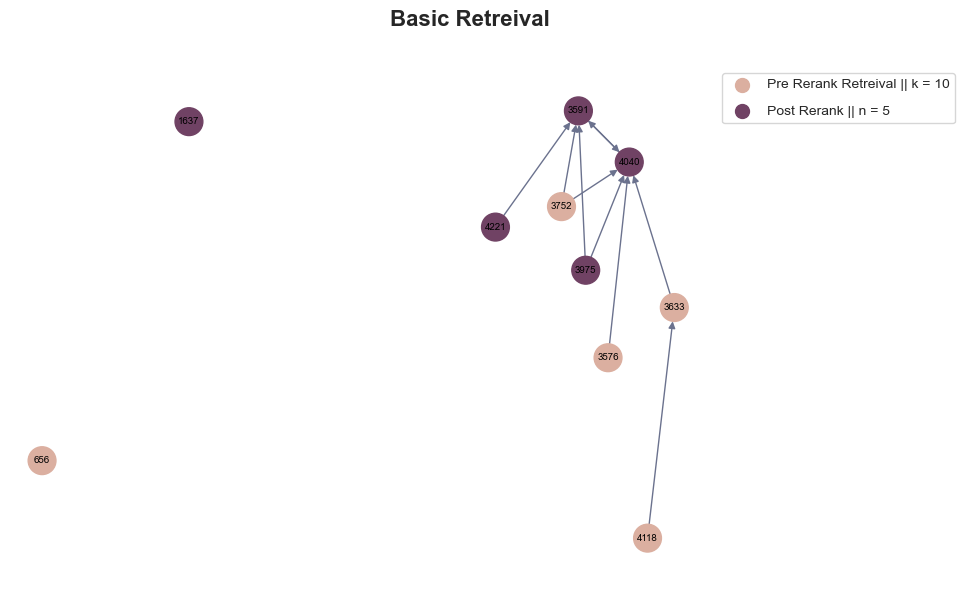

Computing Graph... (basic retrieval = False)


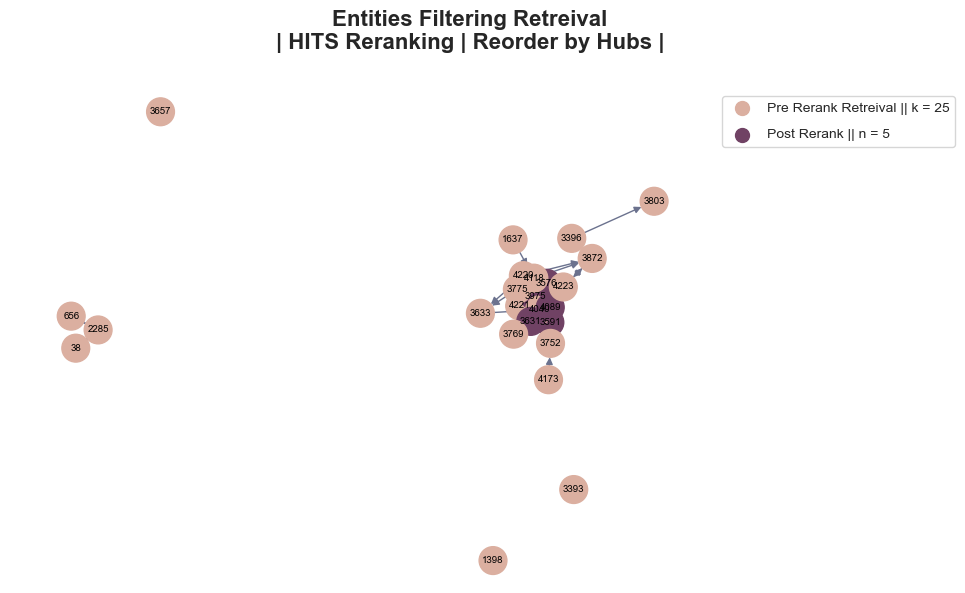

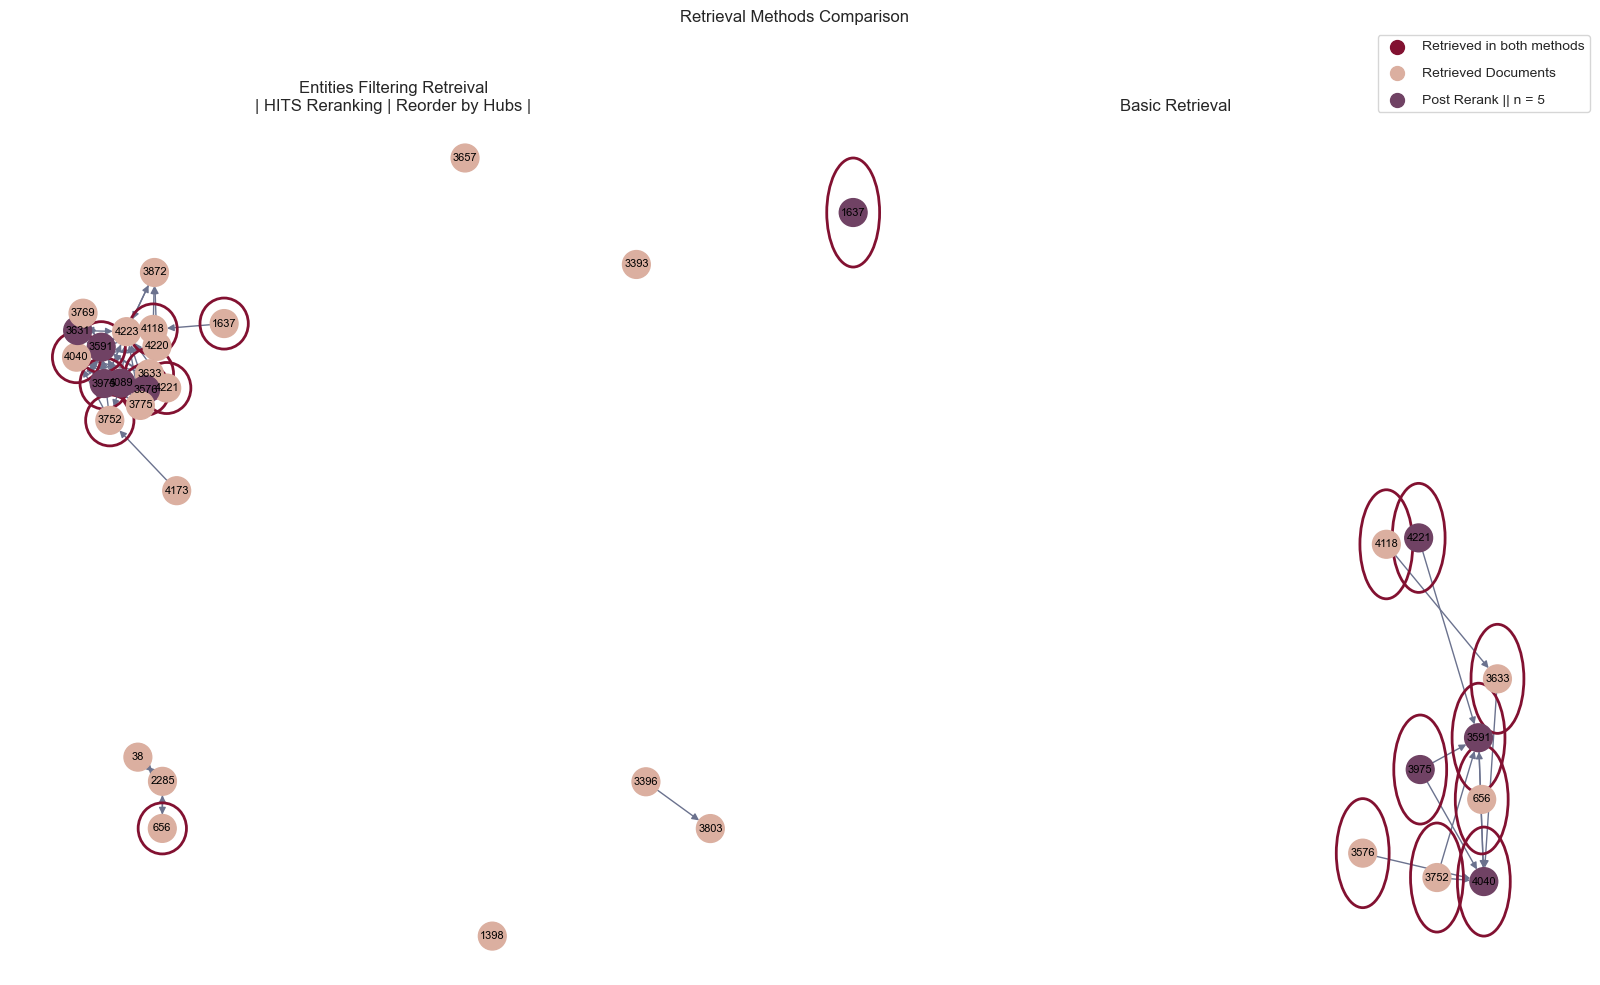

The longest survival rate for an ectopic pregnancy in the fallopian tube is typically associated with the ampulla, which is option b. This is because the ampulla is the widest part of the fallopian tube and can accommodate the growing embryo for a longer period before causing a rupture.
question: Which of the following cry is characterized by loud, high pitched and siren-like wail:

option_a:Obstinate cry.
option_b:Frighten cry.
option_c:Hurt cry.
option_d:Compensatory cry.

Computing Graph... (basic retrieval = True)


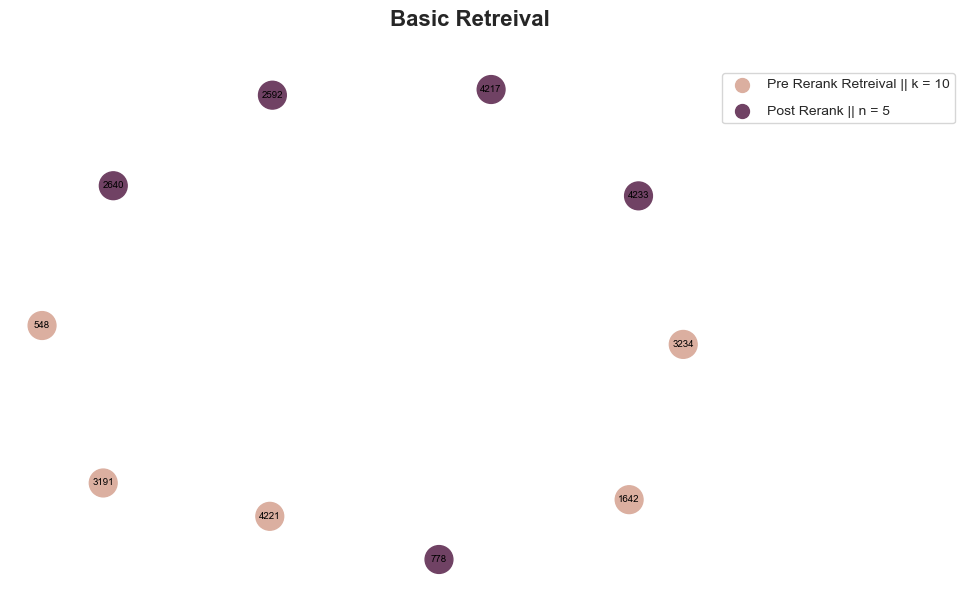

Computing Graph... (basic retrieval = False)


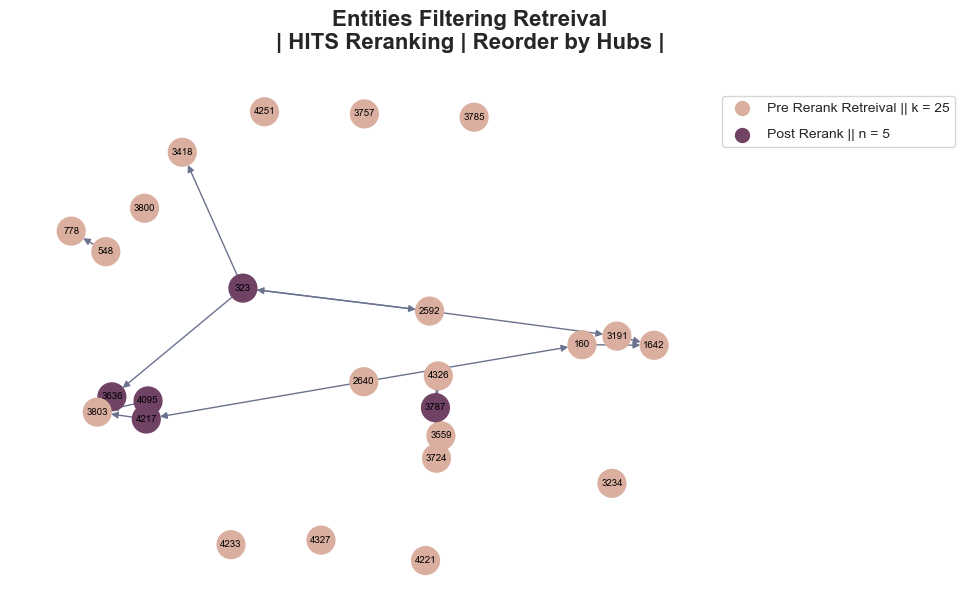

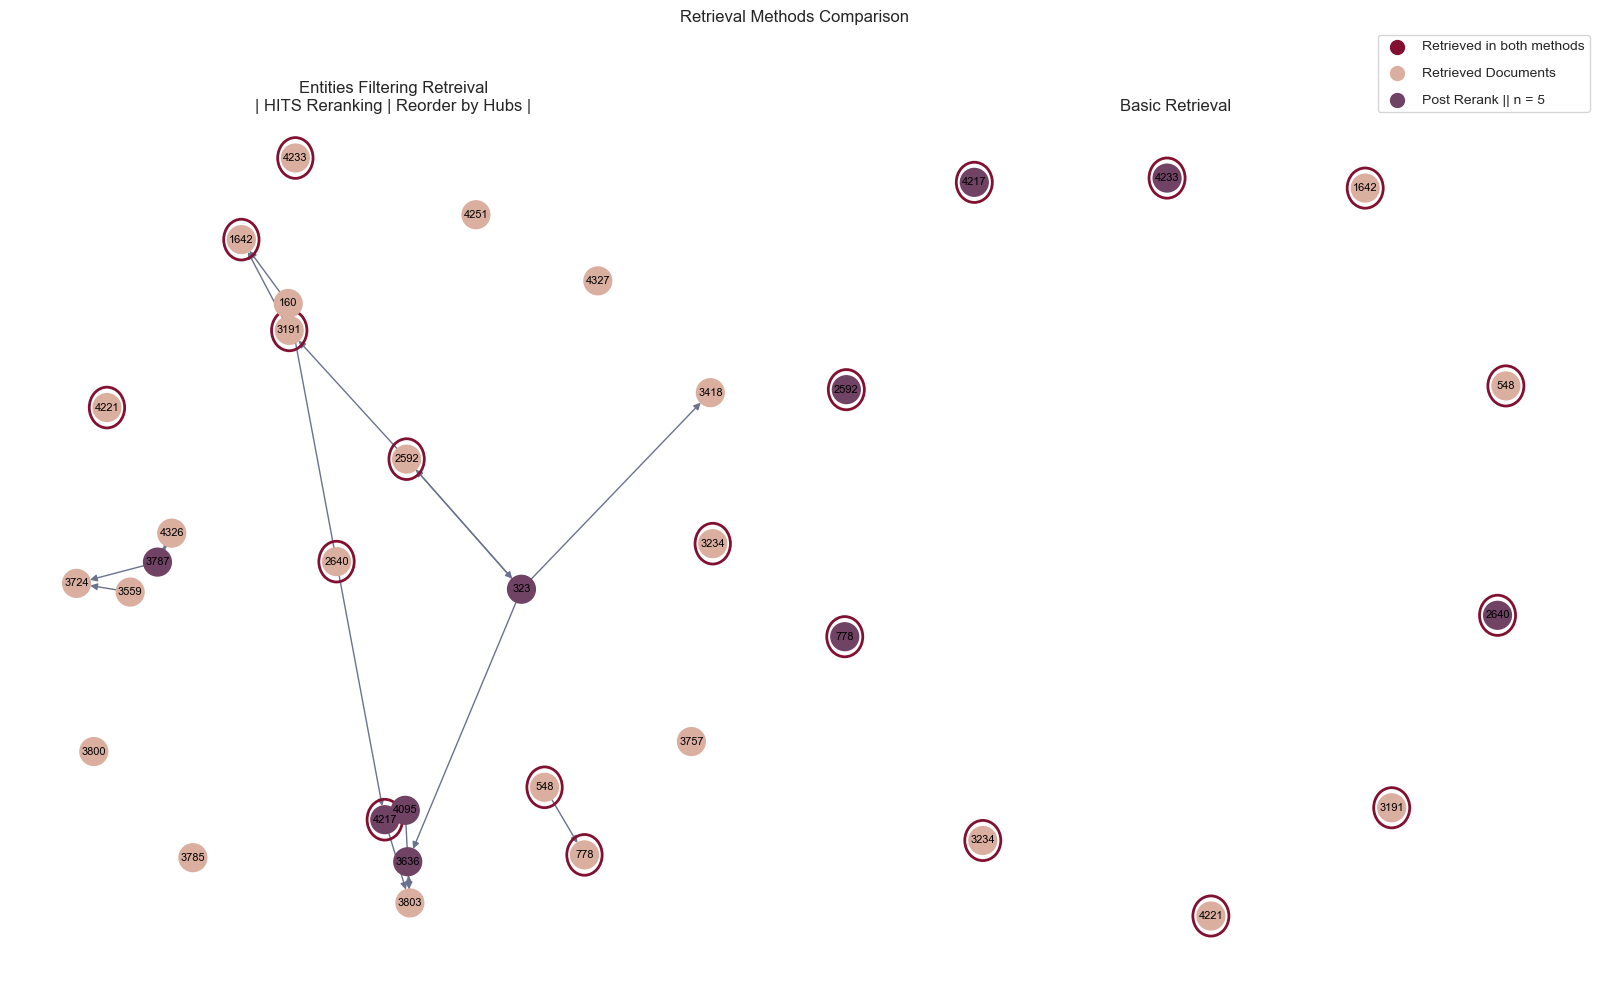

The correct answer is option_b: Frighten cry.
question: Both ketogenic and glucogenic amino acids as

option_a:Isoleucine
option_b:Leucine
option_c:Arginine
option_d:Glycine

Computing Graph... (basic retrieval = True)


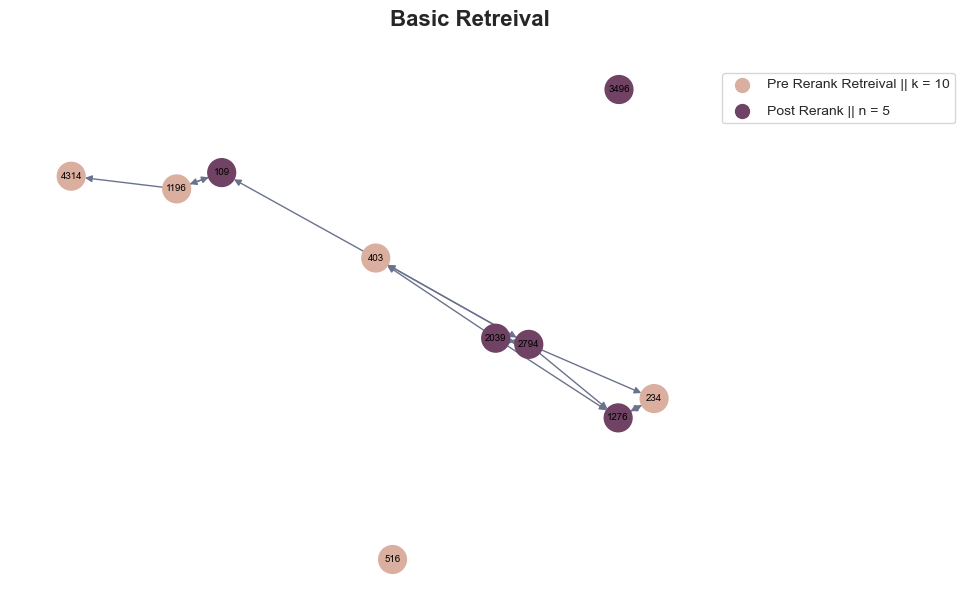

Computing Graph... (basic retrieval = False)


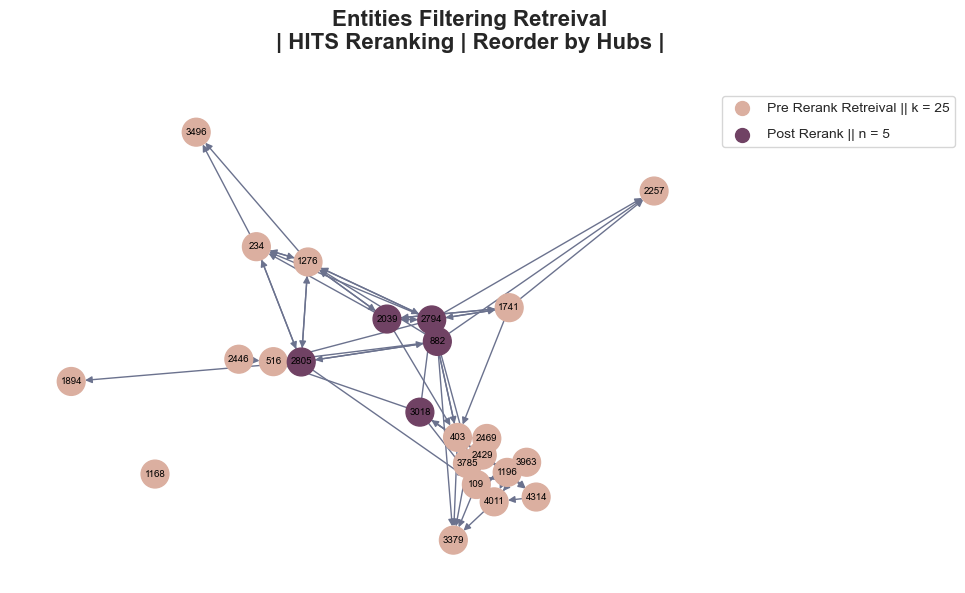

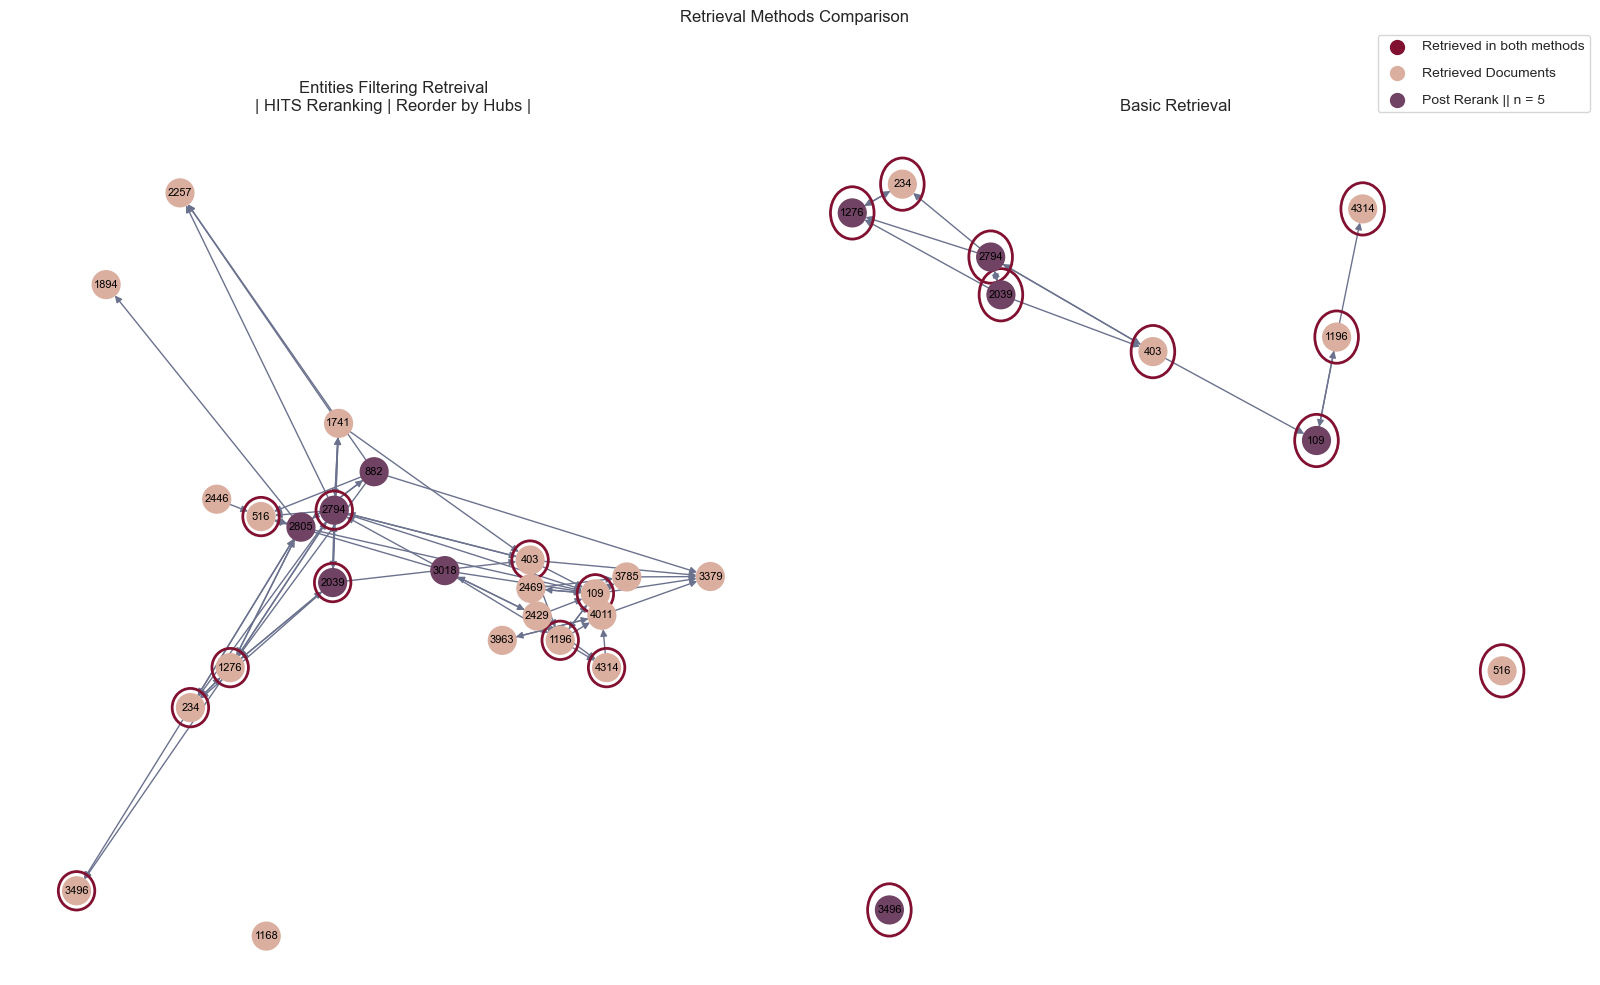

I can answer your query. Both ketogenic and glucogenic amino acids are option_a: Isoleucine and option_b: Leucine.
question: Minimum number of lobes required to form a permanent tooth

option_a:1
option_b:2
option_c:3
option_d:4

Computing Graph... (basic retrieval = True)


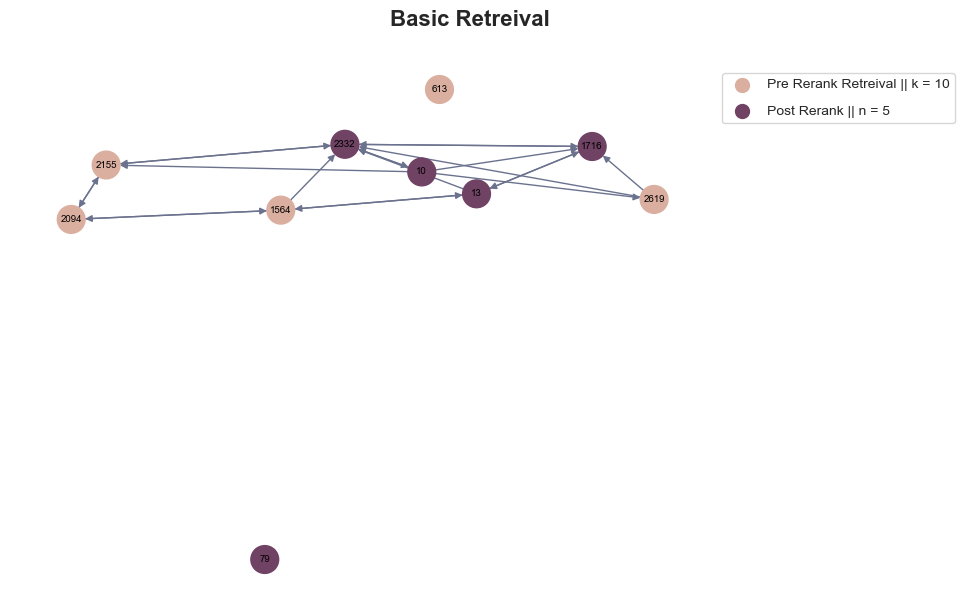

Computing Graph... (basic retrieval = False)


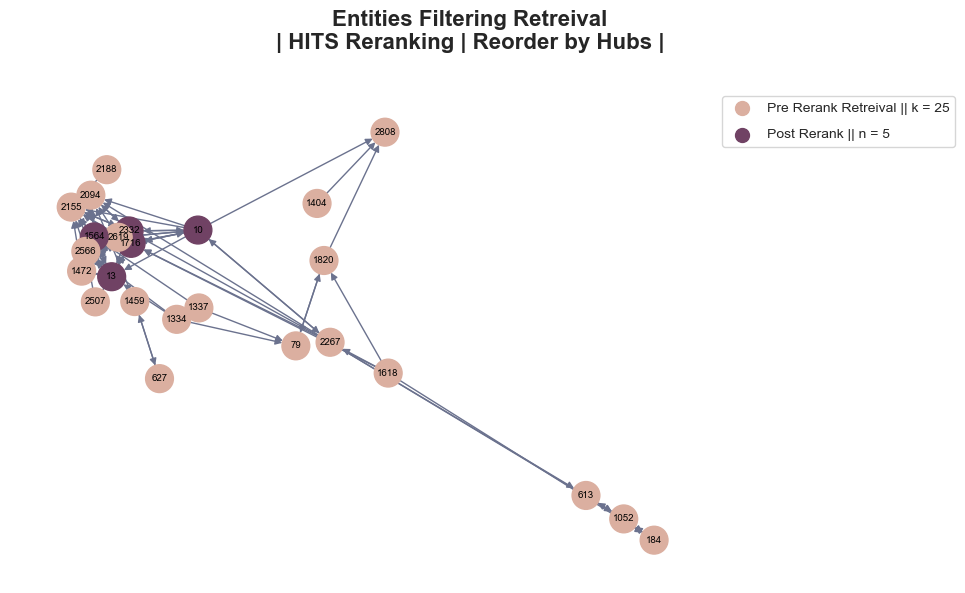

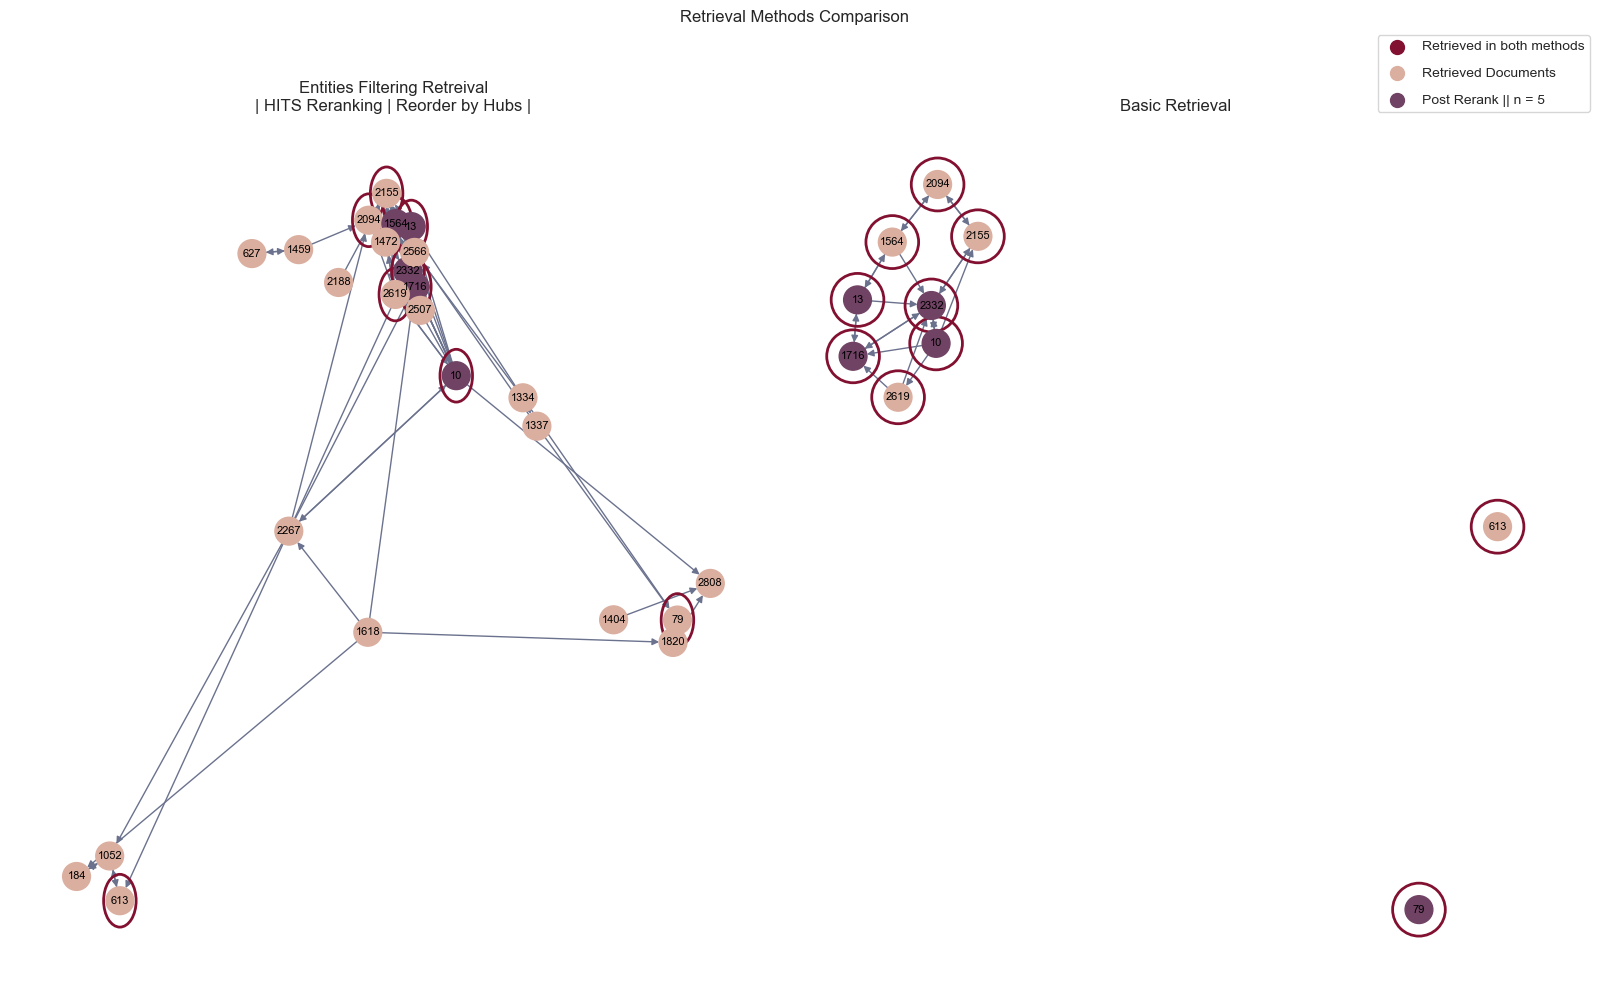

The answer is option_a: 1. A permanent tooth typically has one lobe, but it can also have two or three, depending on the tooth's development and structure.
question: Method of increasing attached gingiva

option_a:Apical flap
option_b:Widman flap
option_c:Undisplaced flap
option_d:Modified widman flap

Computing Graph... (basic retrieval = True)


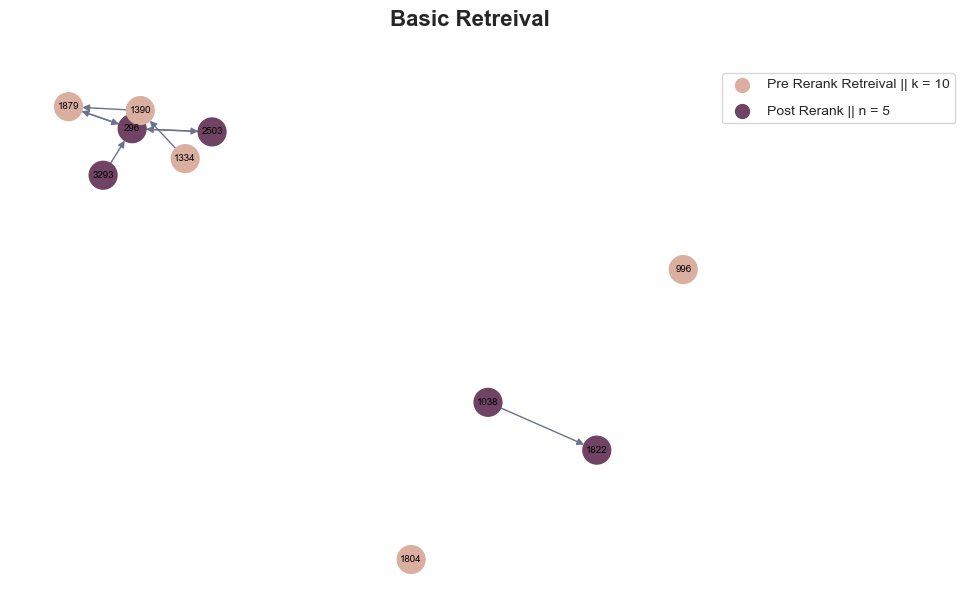

Computing Graph... (basic retrieval = False)


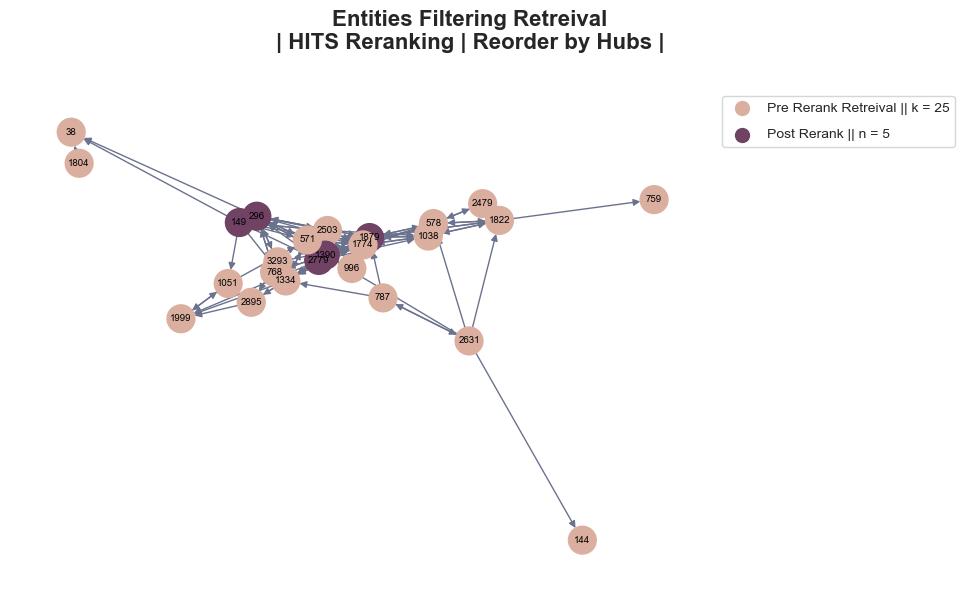

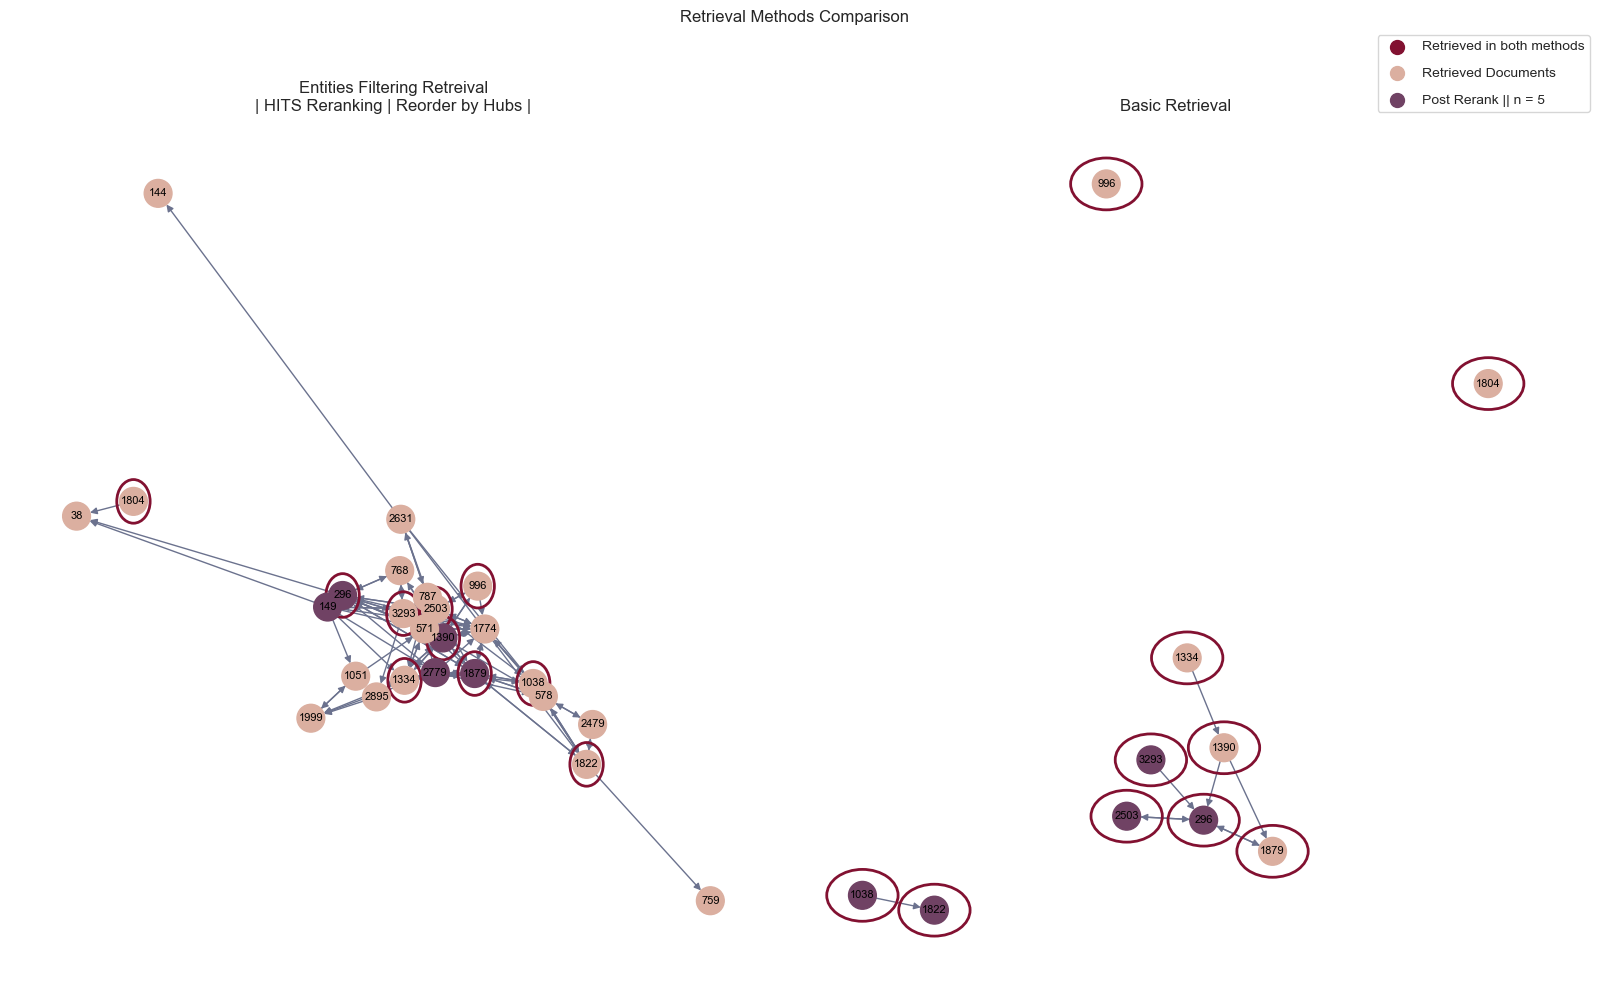

Answer: Apical flap [option_a]
Explanation: The provided context states that an "Apically repositioned flap" is used to increase the width of attached gingiva.
Apical flap.
question: All of the following device work on traction principle except:

option_a:Ferrier double bow separator.
option_b:Elliot separator.
option_c:Perry separator.
option_d:None

Computing Graph... (basic retrieval = True)


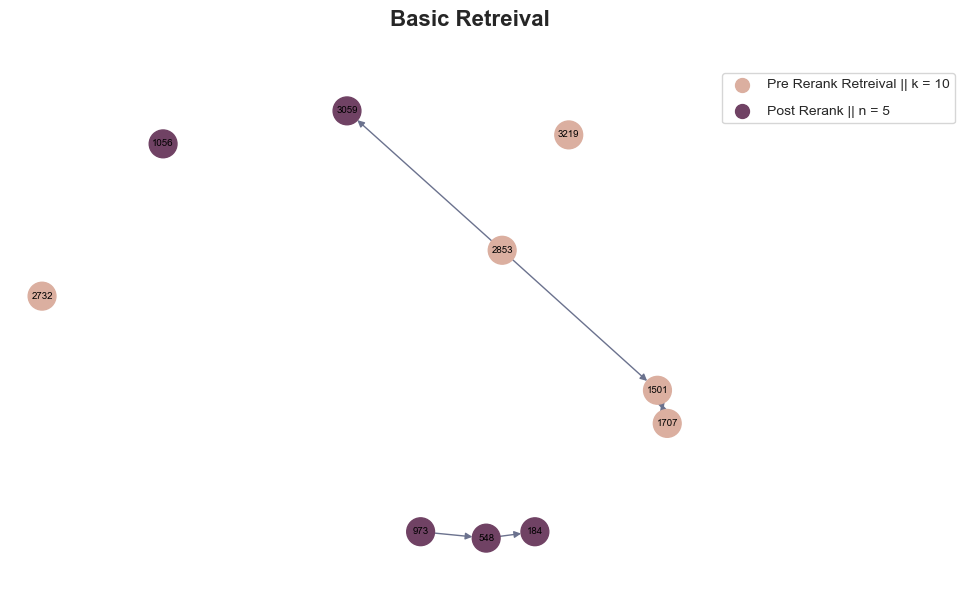

Computing Graph... (basic retrieval = False)


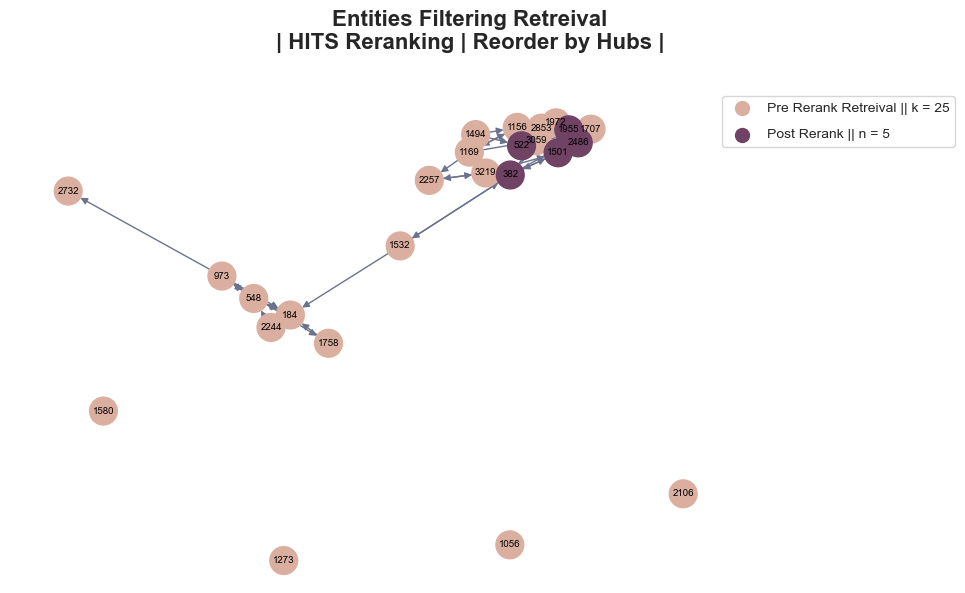

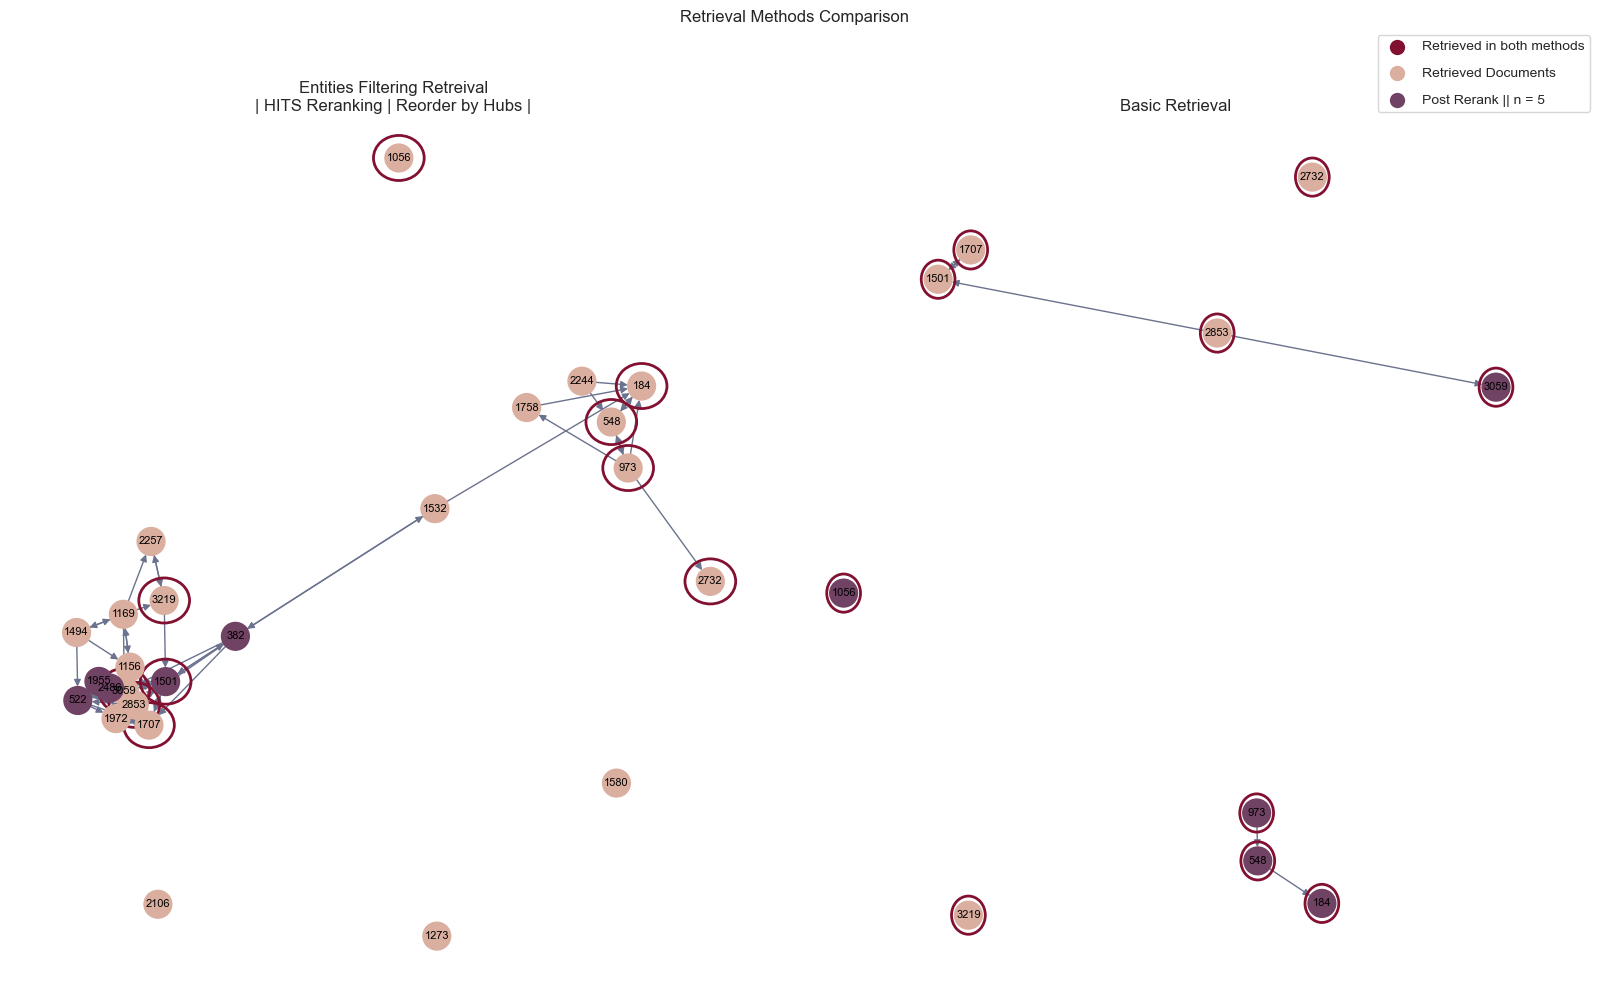

The answer is option_d: None.
question: Most common site of primary for intraocular metastasis is from-

option_a:Breast
option_b:Ovary
option_c:Cervix
option_d:Endometrium

Computing Graph... (basic retrieval = True)


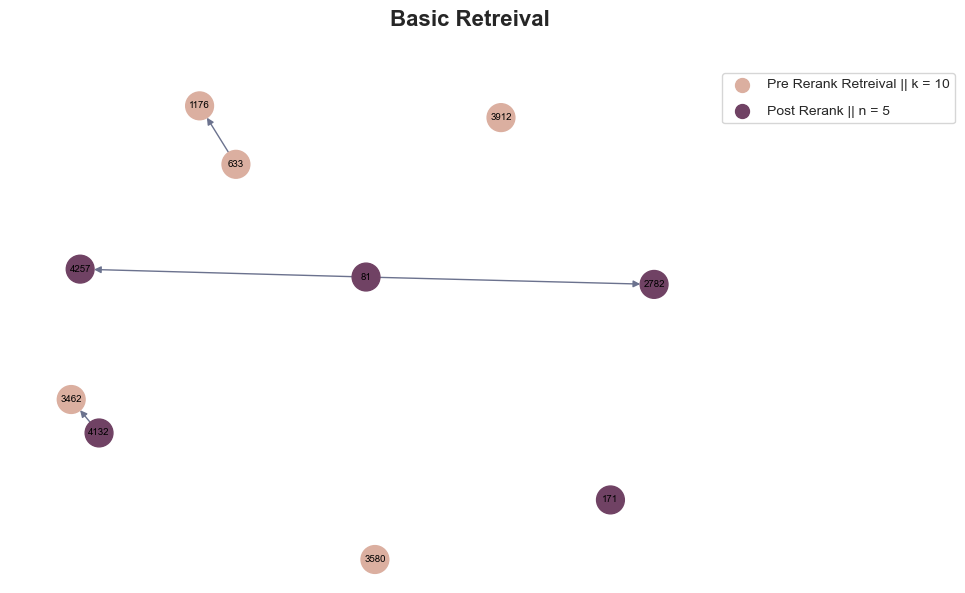

Computing Graph... (basic retrieval = False)


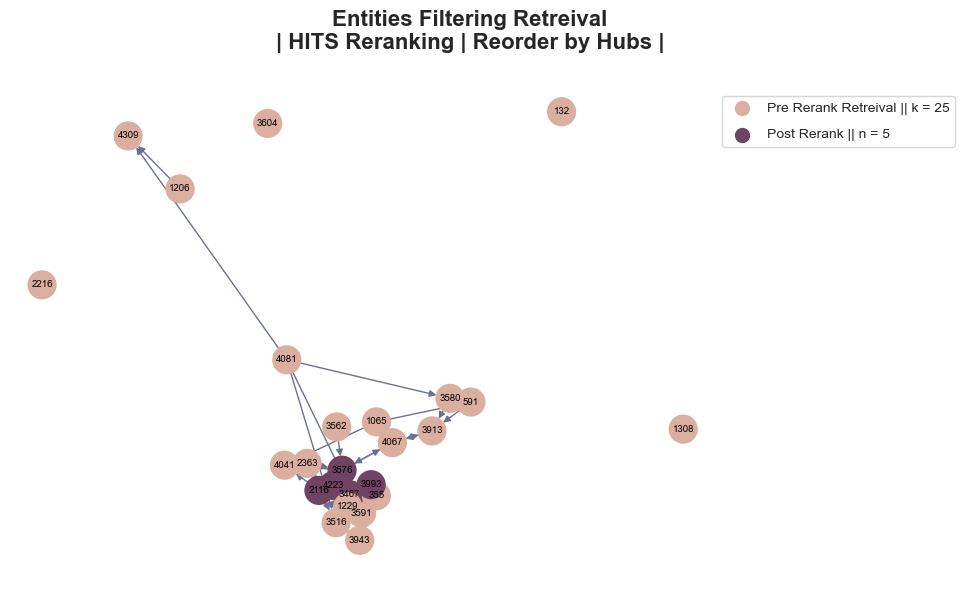

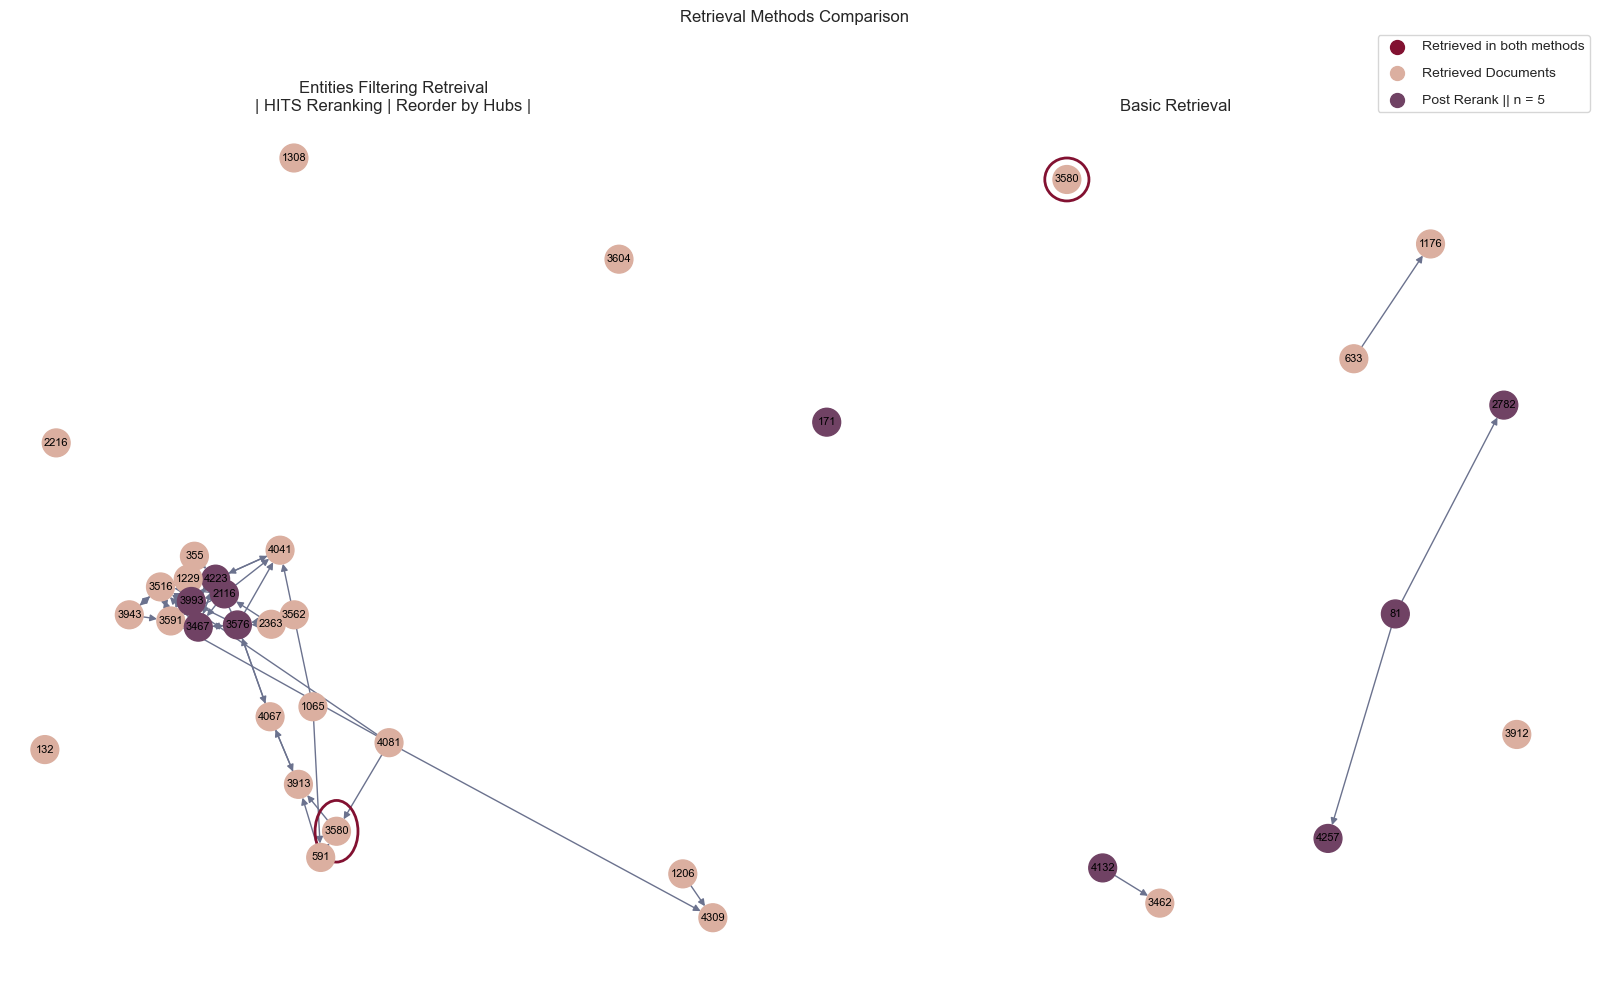

The most common site of primary for intraocular metastasis is from the breast.
question: The principal reason for placing an aluminium filter in
the primary beam of radiation is to:

option_a:Reduce exposure time
option_b:Decrease development time of the films
option_c:Reduce radiation to the skin of the patient
option_d:Obtain greater definition of the images of teeth

Computing Graph... (basic retrieval = True)


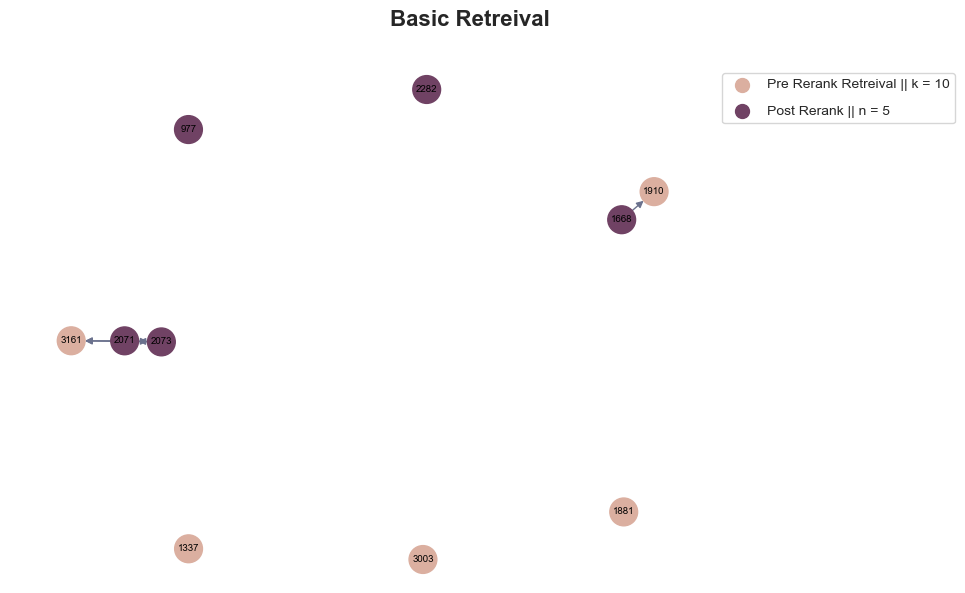

Computing Graph... (basic retrieval = False)


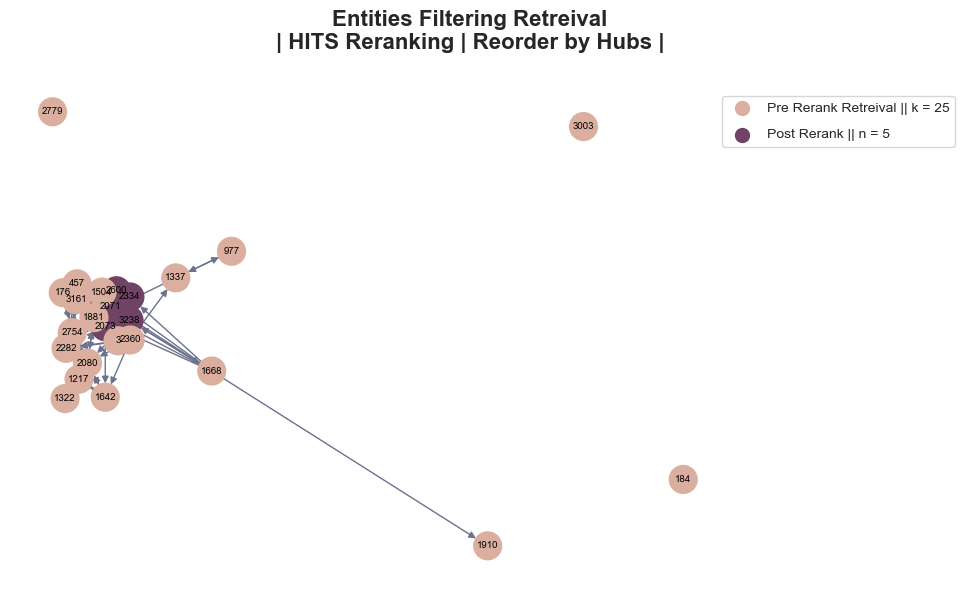

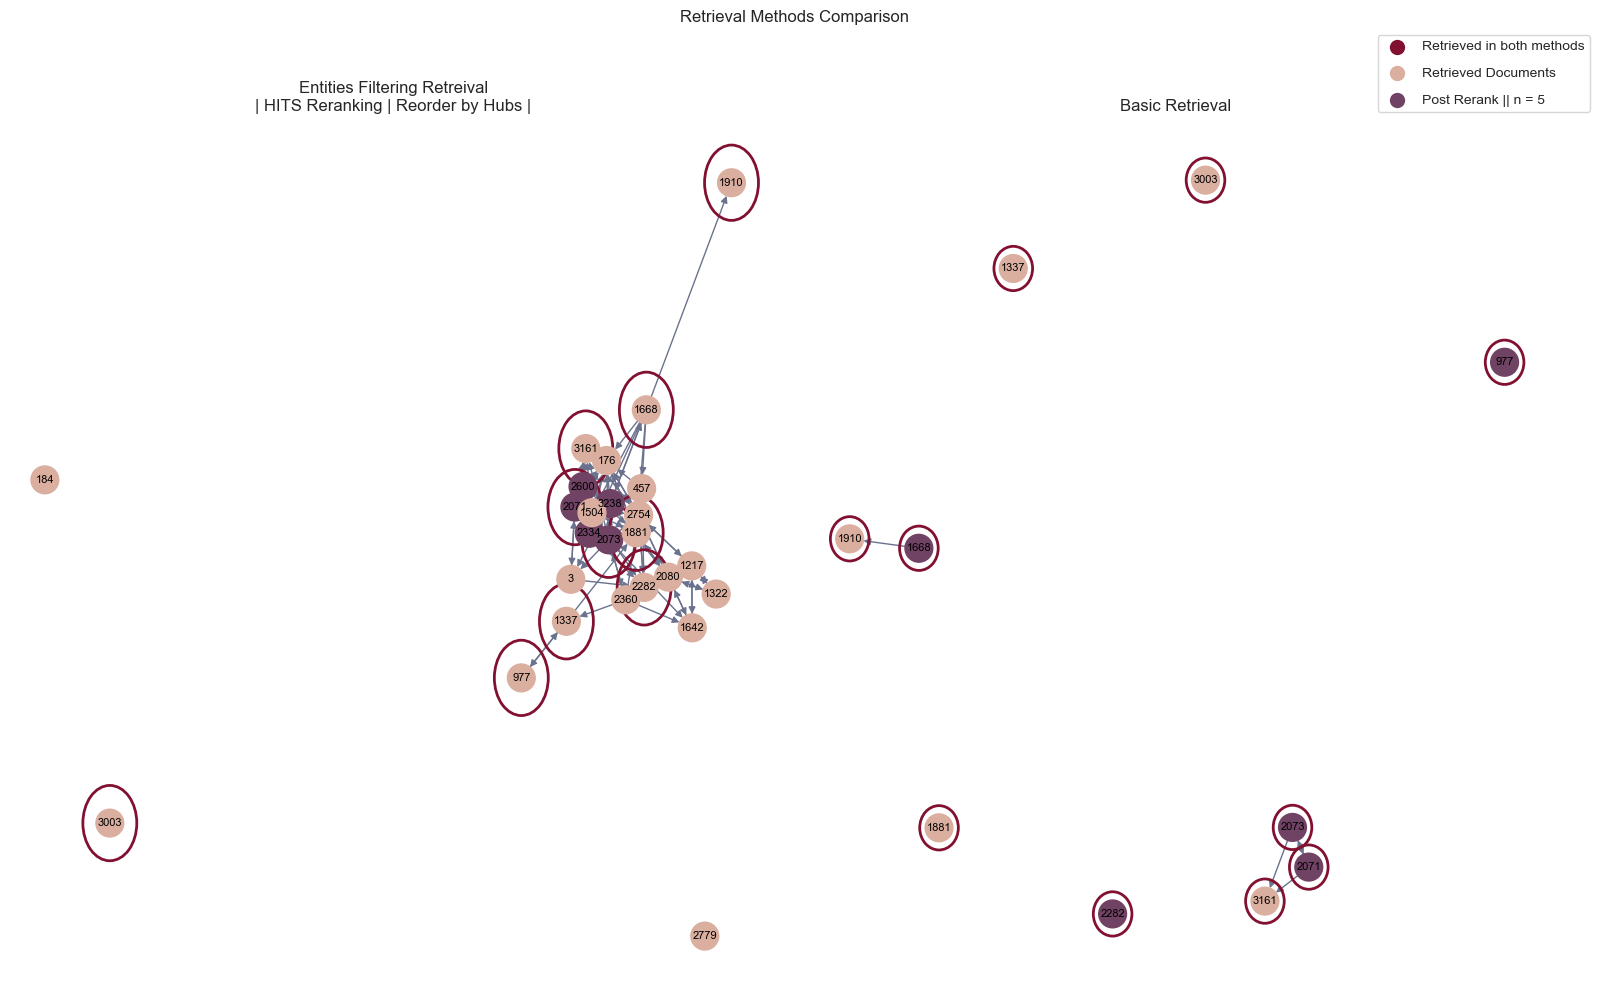

Answer: option_c
Explanation: The provided context mentions that placing an aluminum filter in the primary beam of radiation reduces patient radiation exposure. This aligns with the correct answer, option C, which states that the primary reason for this action is to "reduce radiation to the skin of the patient."
The principal reason for placing an aluminum filter in the primary beam of radiation is to reduce radiation to the patient's skin.

Therefore, the correct answer is option c.
question: Sealer penetration into dentinal tubule depends mainly on?

option_a:Type of sealer used
option_b:Method of obturation
option_c:Not Recalled
option_d:Not Recalled

Computing Graph... (basic retrieval = True)


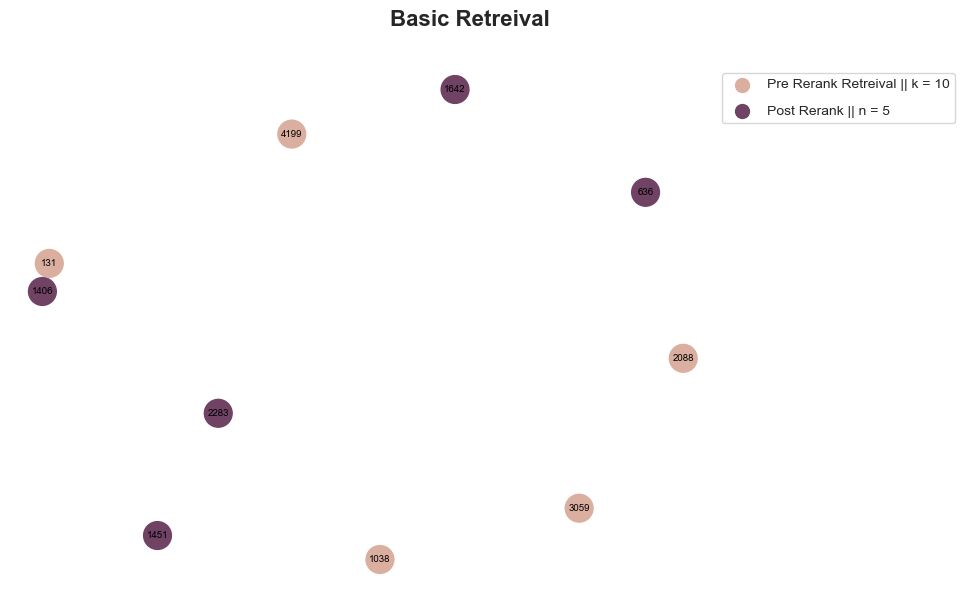

Computing Graph... (basic retrieval = False)


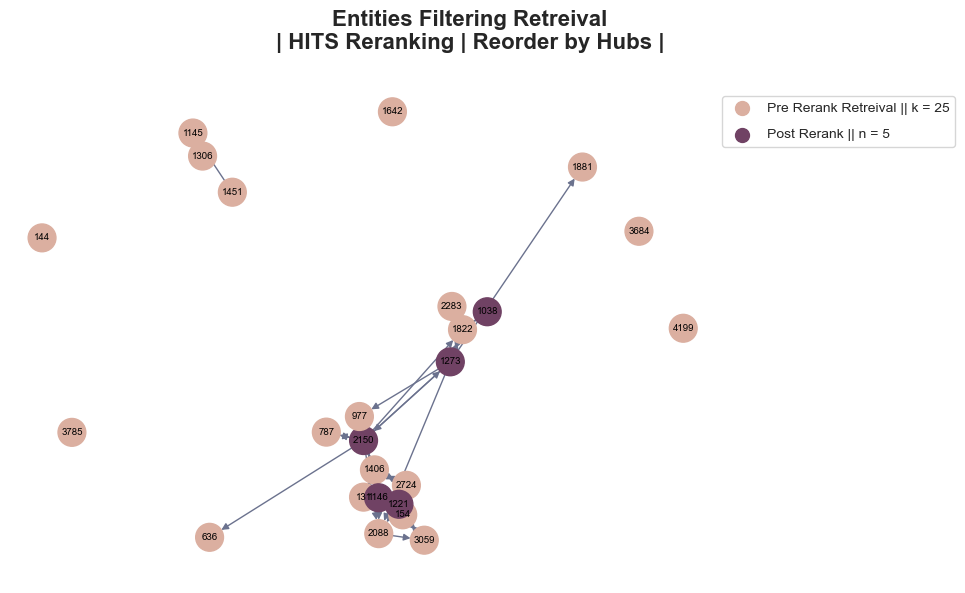

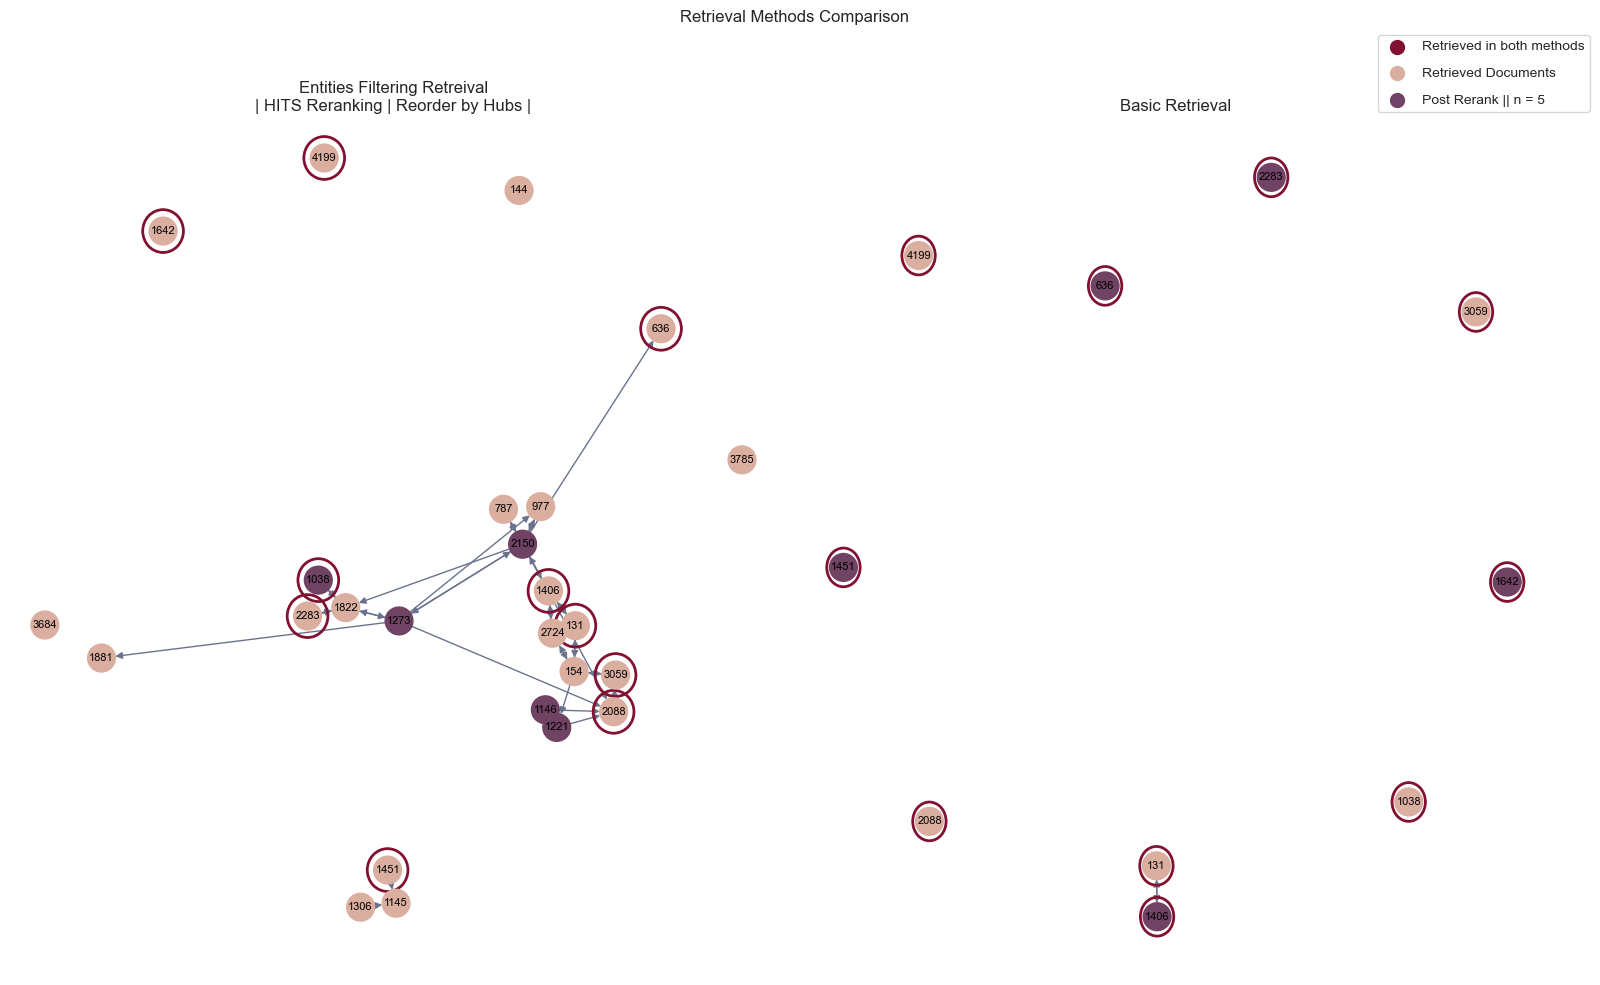

Option A: Type of sealer used.
question: The proximal walls of a class II cavity on a deciduous molar:

option_a:Follow directions of enamel rods
option_b:Converge toward occlusal surface
option_c:Diverge toward occlusal surface
option_d:Undermine enamel which is very thin

Computing Graph... (basic retrieval = True)


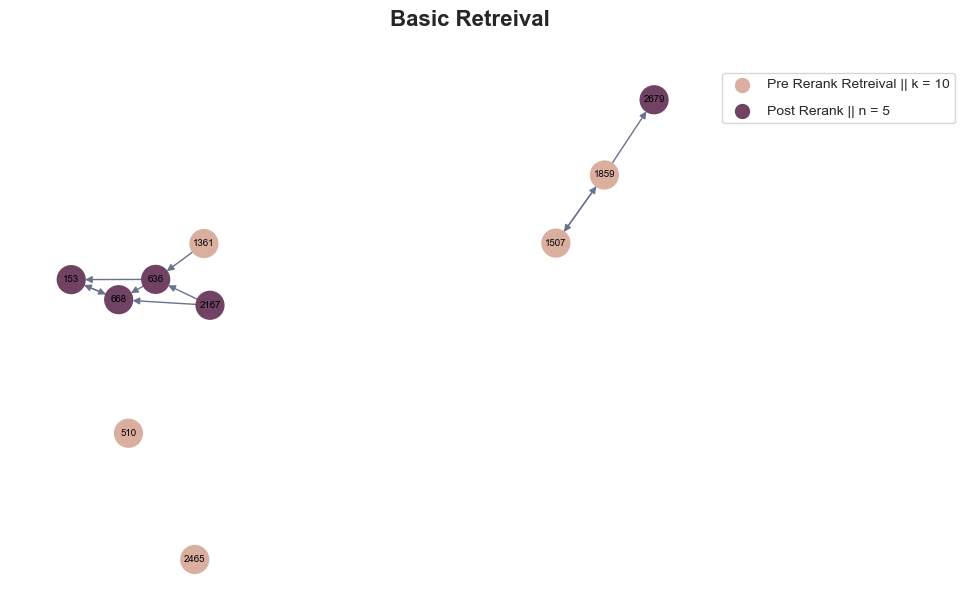

Computing Graph... (basic retrieval = False)


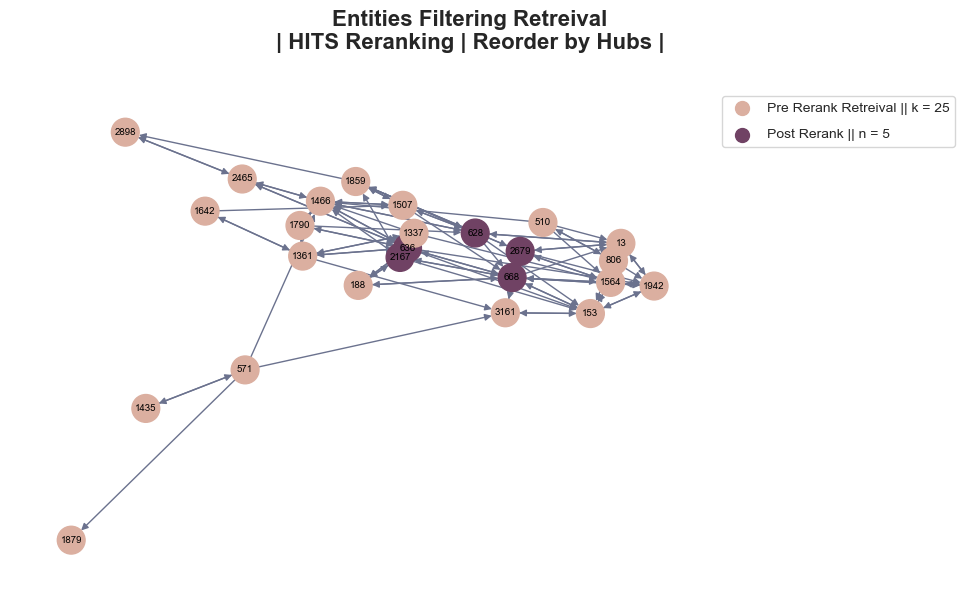

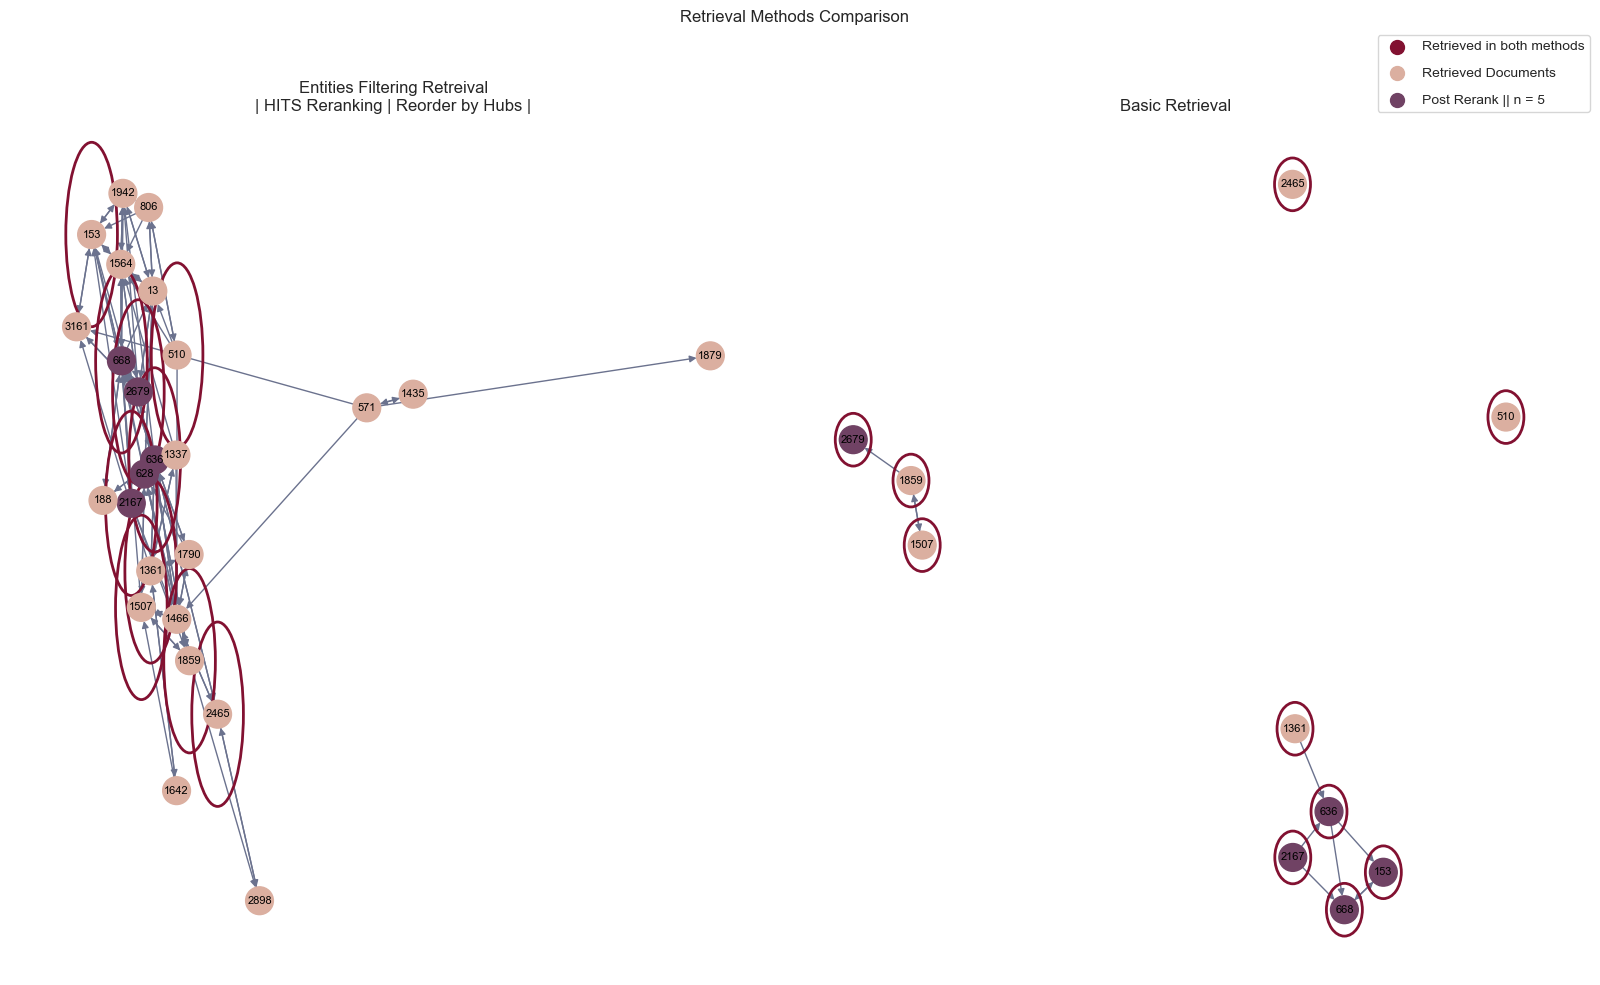

Answer: option_a
Explanation: The context mentions that the "Mesial and distal wall of a class V cavity depends on the direction of enamel rods." While this information does not directly refer to a class II cavity on a deciduous molar, it provides a general principle that the direction of enamel rods influences the preparation of cavity walls. Therefore, it is reasonable to assume that the same principle applies to the proximal walls of a class II cavity.
The answer is option_a: Follow directions of enamel rods.
question: Most common cause of interochanteric fracture in old is -

option_a:Osteoporosis
option_b:Paget's dis
option_c:Osteopetrosis
option_d:Osteomalacia

Computing Graph... (basic retrieval = True)


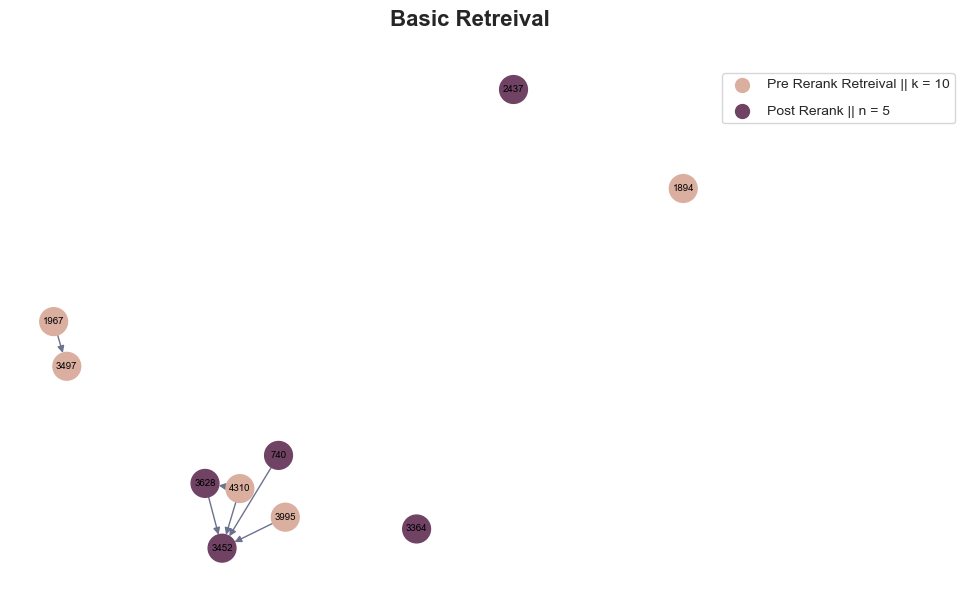

Computing Graph... (basic retrieval = False)


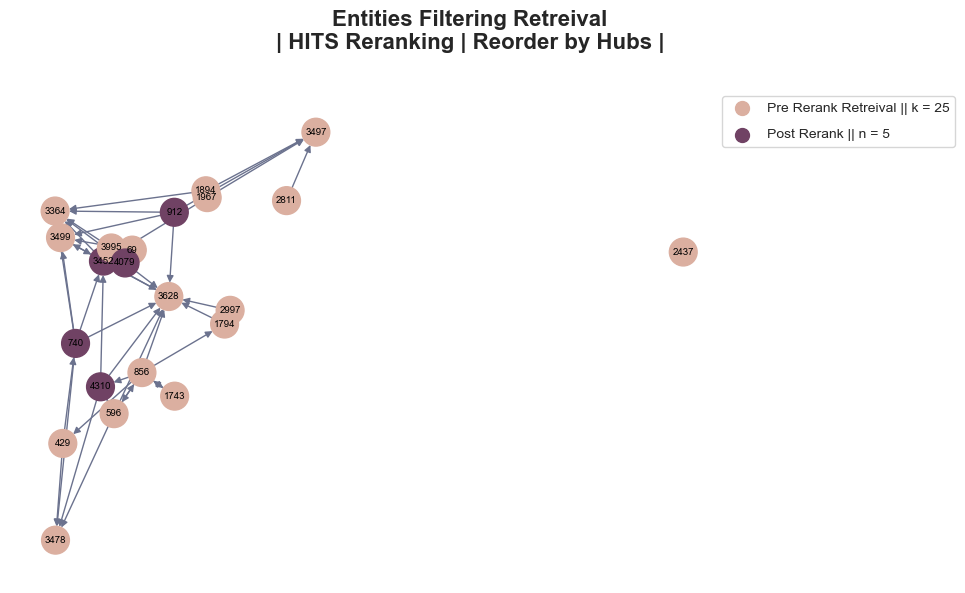

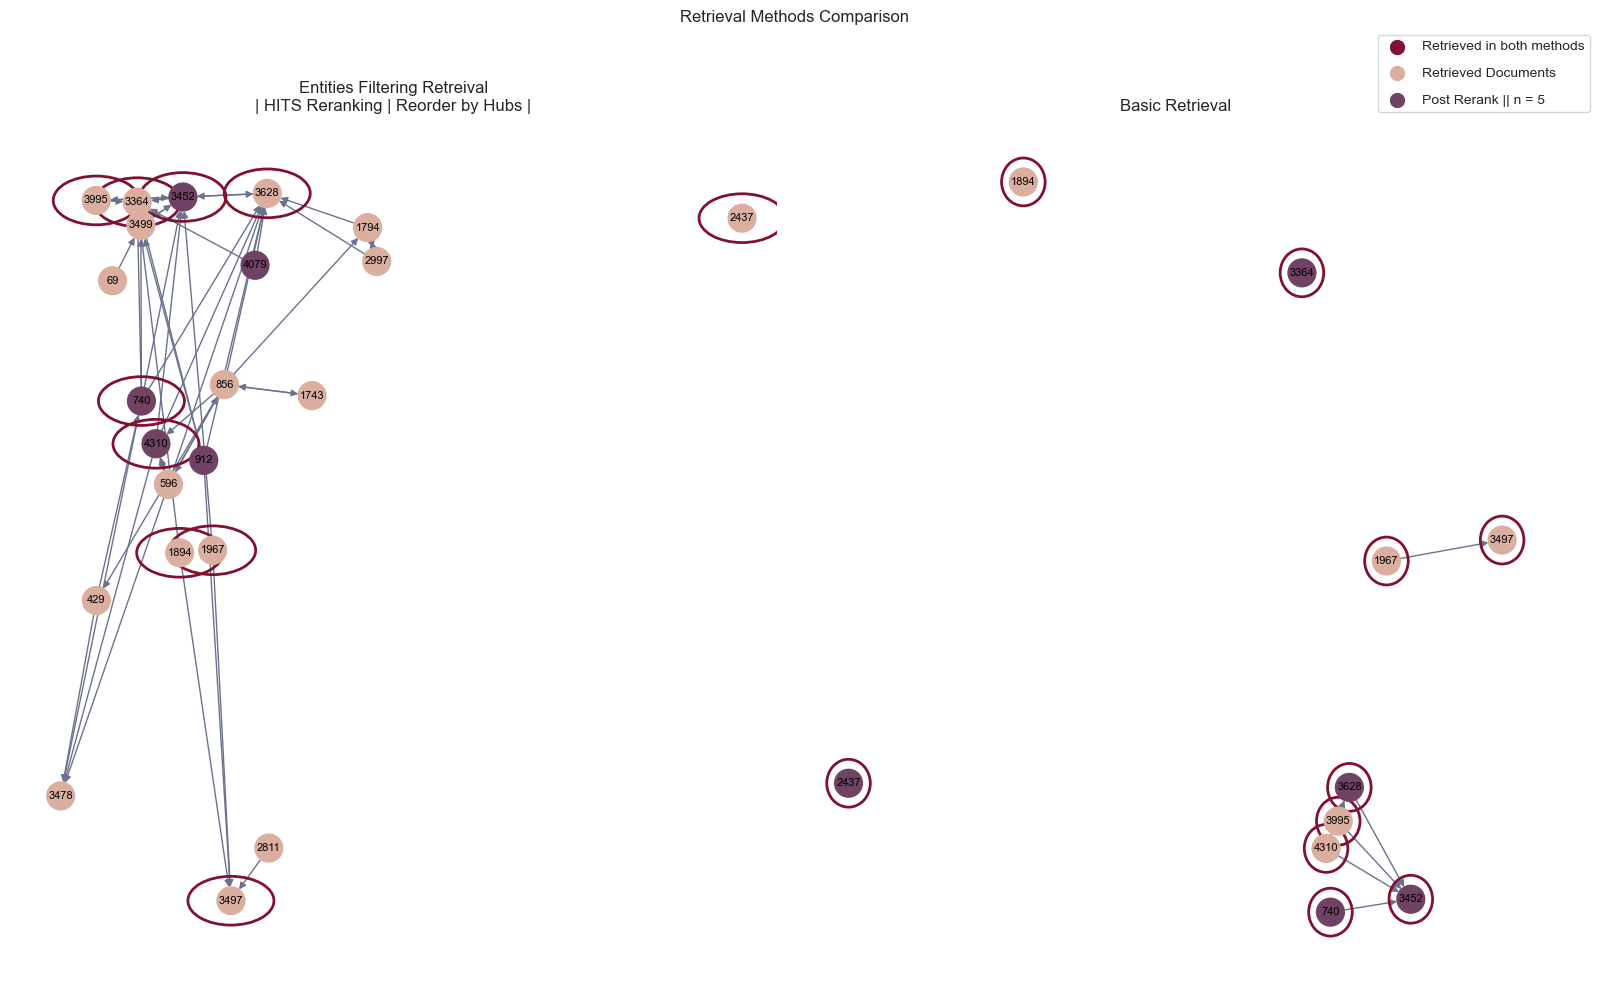

Answer: option_a: Osteoporosis
Explanation: Osteoporosis is a common condition in older individuals, particularly postmenopausal women, and is characterized by low bone density, making bones weak and prone to fracture. The text mentions that excess adrenocorticosteroids can cause osteoporosis, and the 68-year-old patient's DEXA scan revealed osteopenia, which is a precursor to osteoporosis. While other conditions like Paget's disease and osteomalacia can also contribute to bone fractures, osteoporosis is the most prevalent condition associated with bone fragility and fracture risk in the elderly.
The most common cause of intertrochanteric fracture in the elderly is option_a: Osteoporosis.
question: Chances of ankyloses of mandibular molar which is autotransplanted depends on?

option_a:Splinting of mandibular molar
option_b:Surgical extraction of molar
option_c:Socket preparation of molar for autotransplantation
option_d:Root kept moist in cotton

Computing Graph... (basic retrieval = 

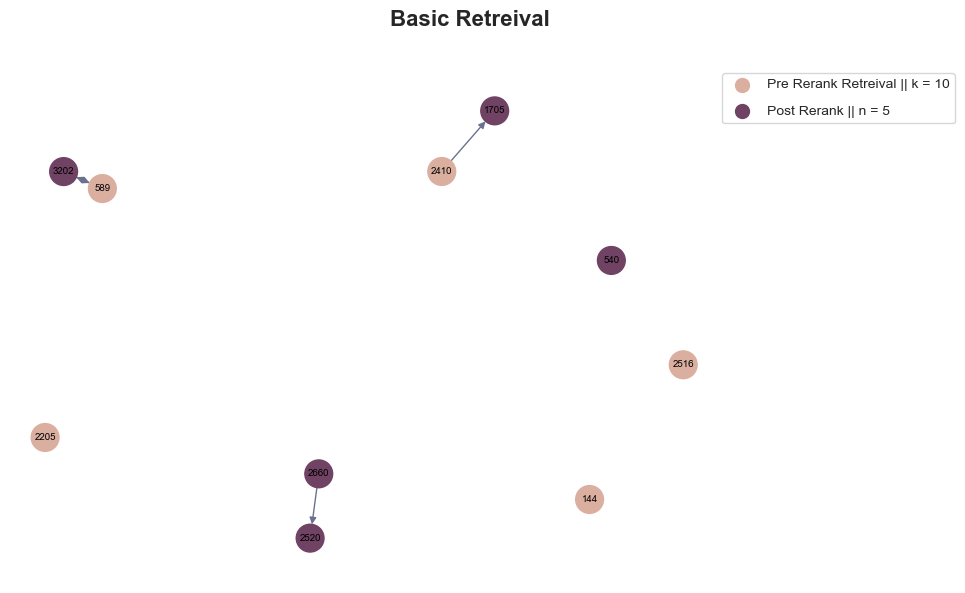

Computing Graph... (basic retrieval = False)


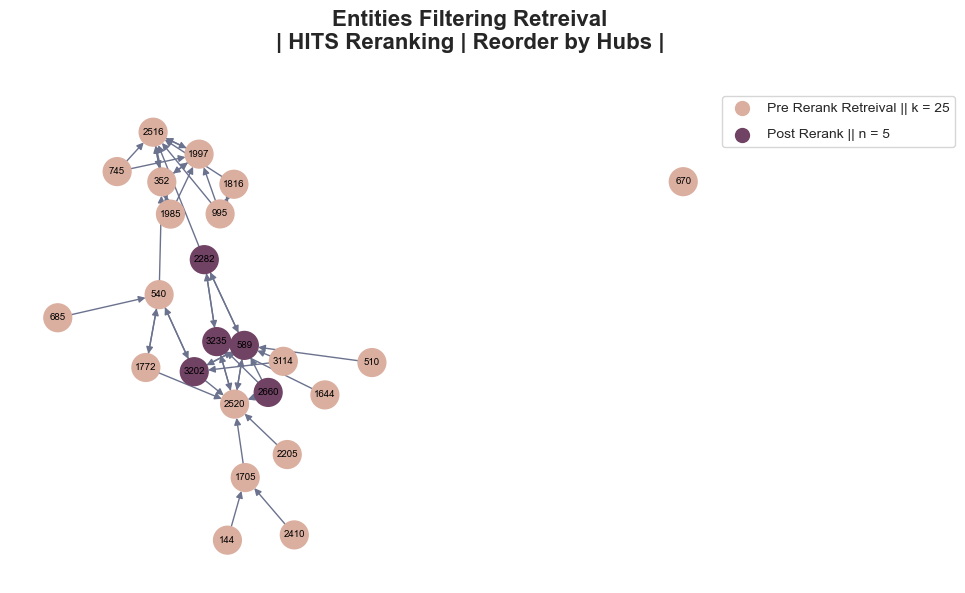

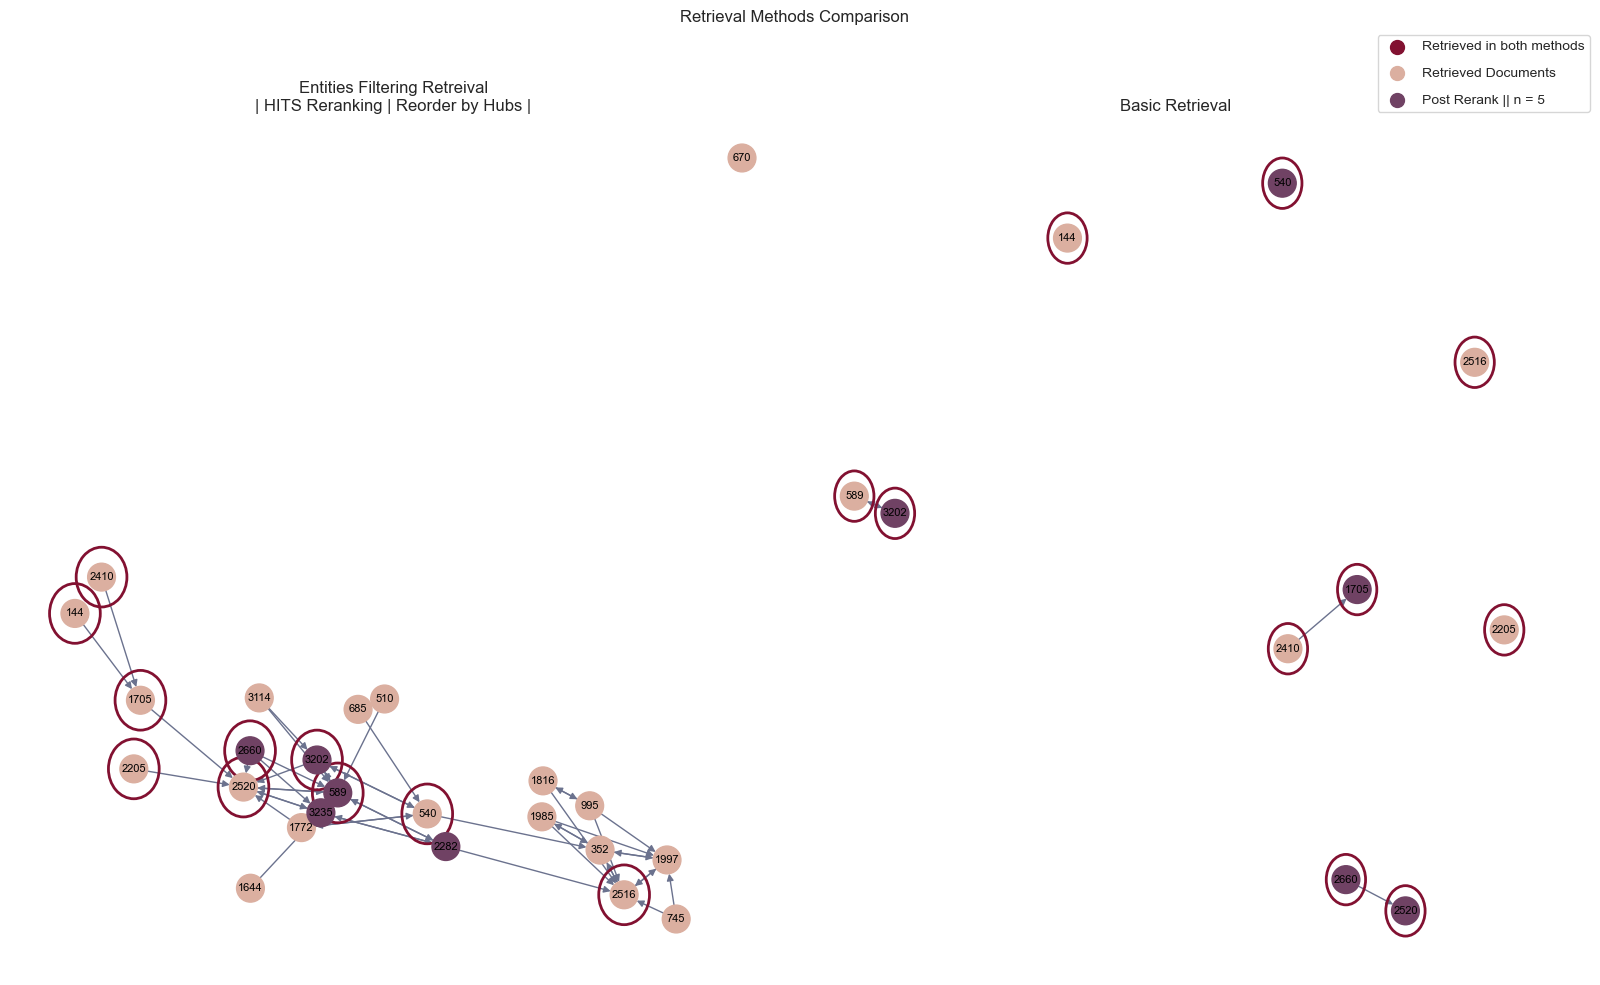

Answer: option_a: Splinting of mandibular molar

Explanation: While the provided information does not directly answer the question, it can be inferred that splinting of the mandibular molar is a critical step in the reimplantation process. This is supported by the context, which emphasizes the importance of stabilizing the tooth after reimplantation using a flexible splint. The splint helps to keep the tooth in place and stabilize it, which likely influences the chances of ankylosis.
The chances of ankylosis of a mandibular molar that is autotransplanted depend on several factors, including the age of the patient, the stage of root development, the presence or absence of a luxation membrane, and the quality of the surgical technique.

Among the options provided, the correct answer is:
**option_a: Splinting of mandibular molar**

Proper splinting of the autotransplanted mandibular molar is crucial to prevent tooth movement and micro-trauma, which can lead to ankylosis. The splint helps 

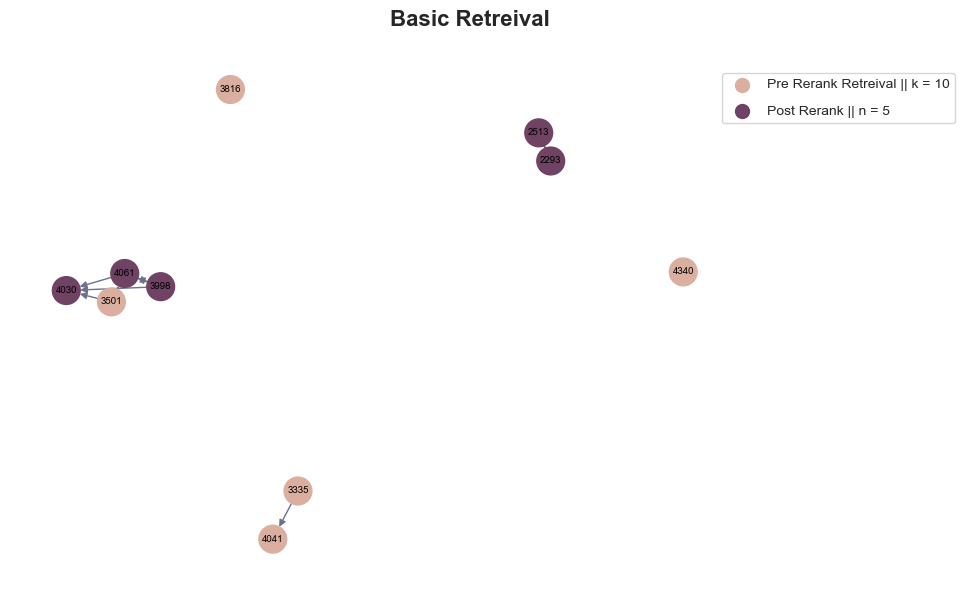

Computing Graph... (basic retrieval = False)


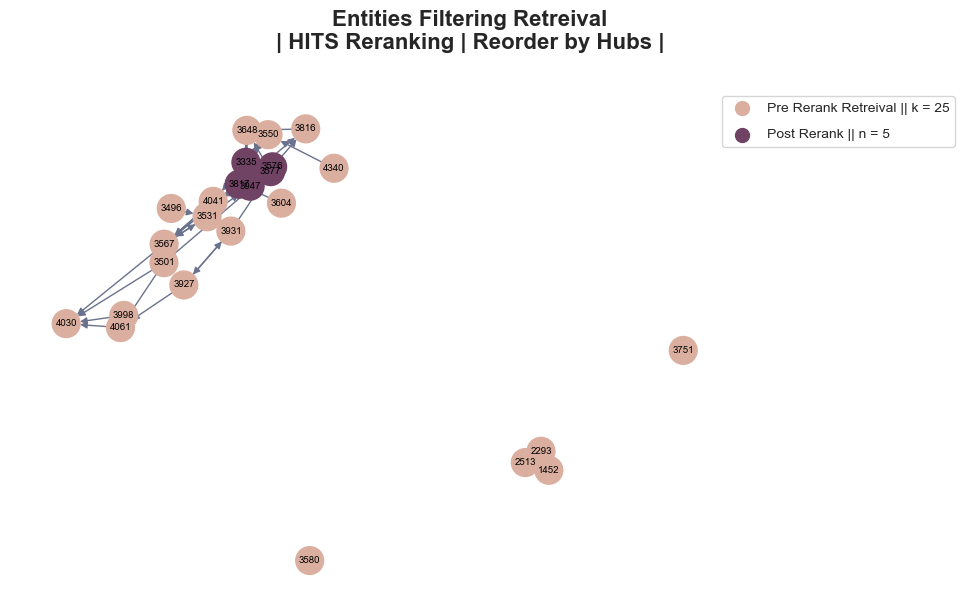

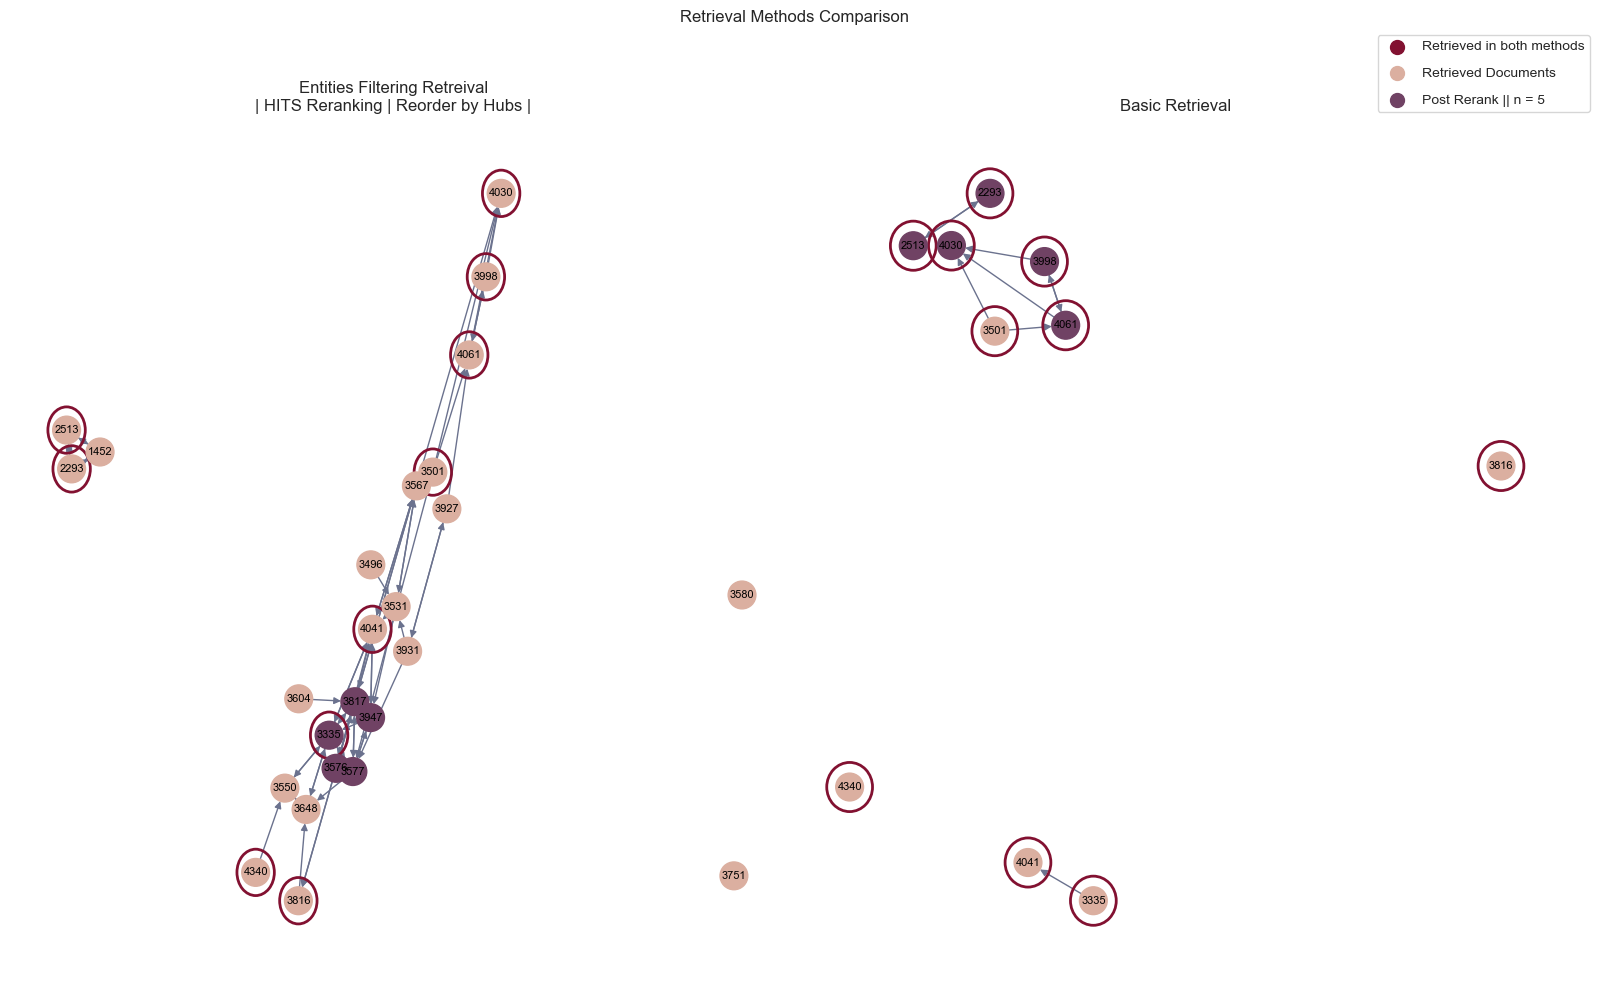

CrPC 175.
question: A mother comes with her 3 months' child asking the physician if she can give cereals to her child. What problems can this lead to her child?

option_a:Allergy due to the food content
option_b:Risk of gastrointestinal infection
option_c:Retarded oro-motor development
option_d:Contaminated food leading to reflux

Computing Graph... (basic retrieval = True)


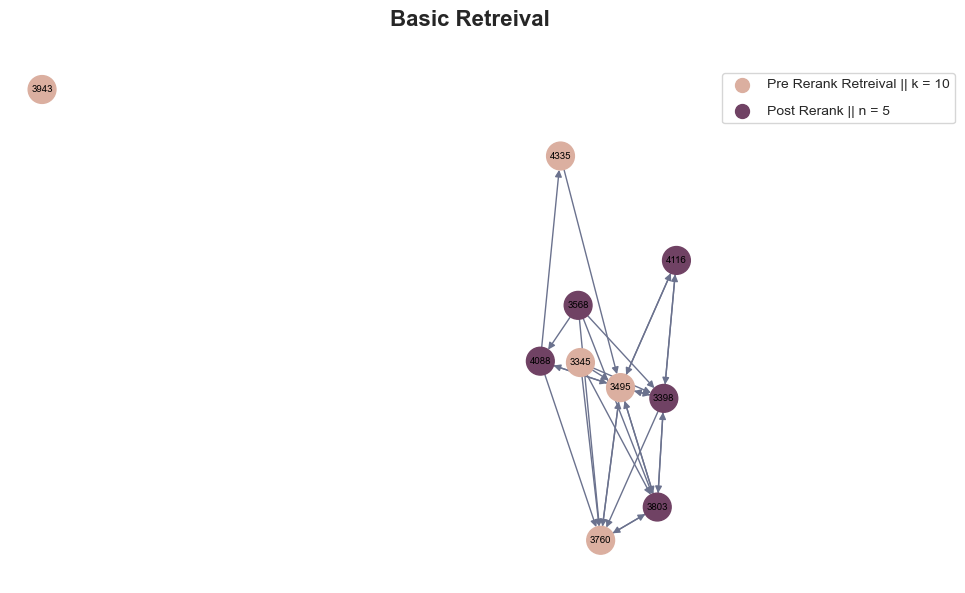

Computing Graph... (basic retrieval = False)


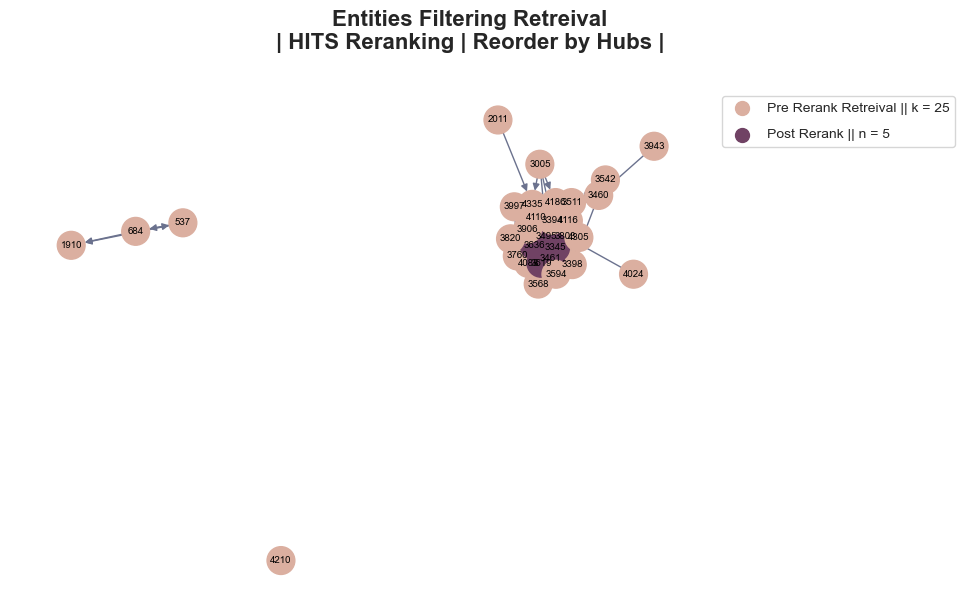

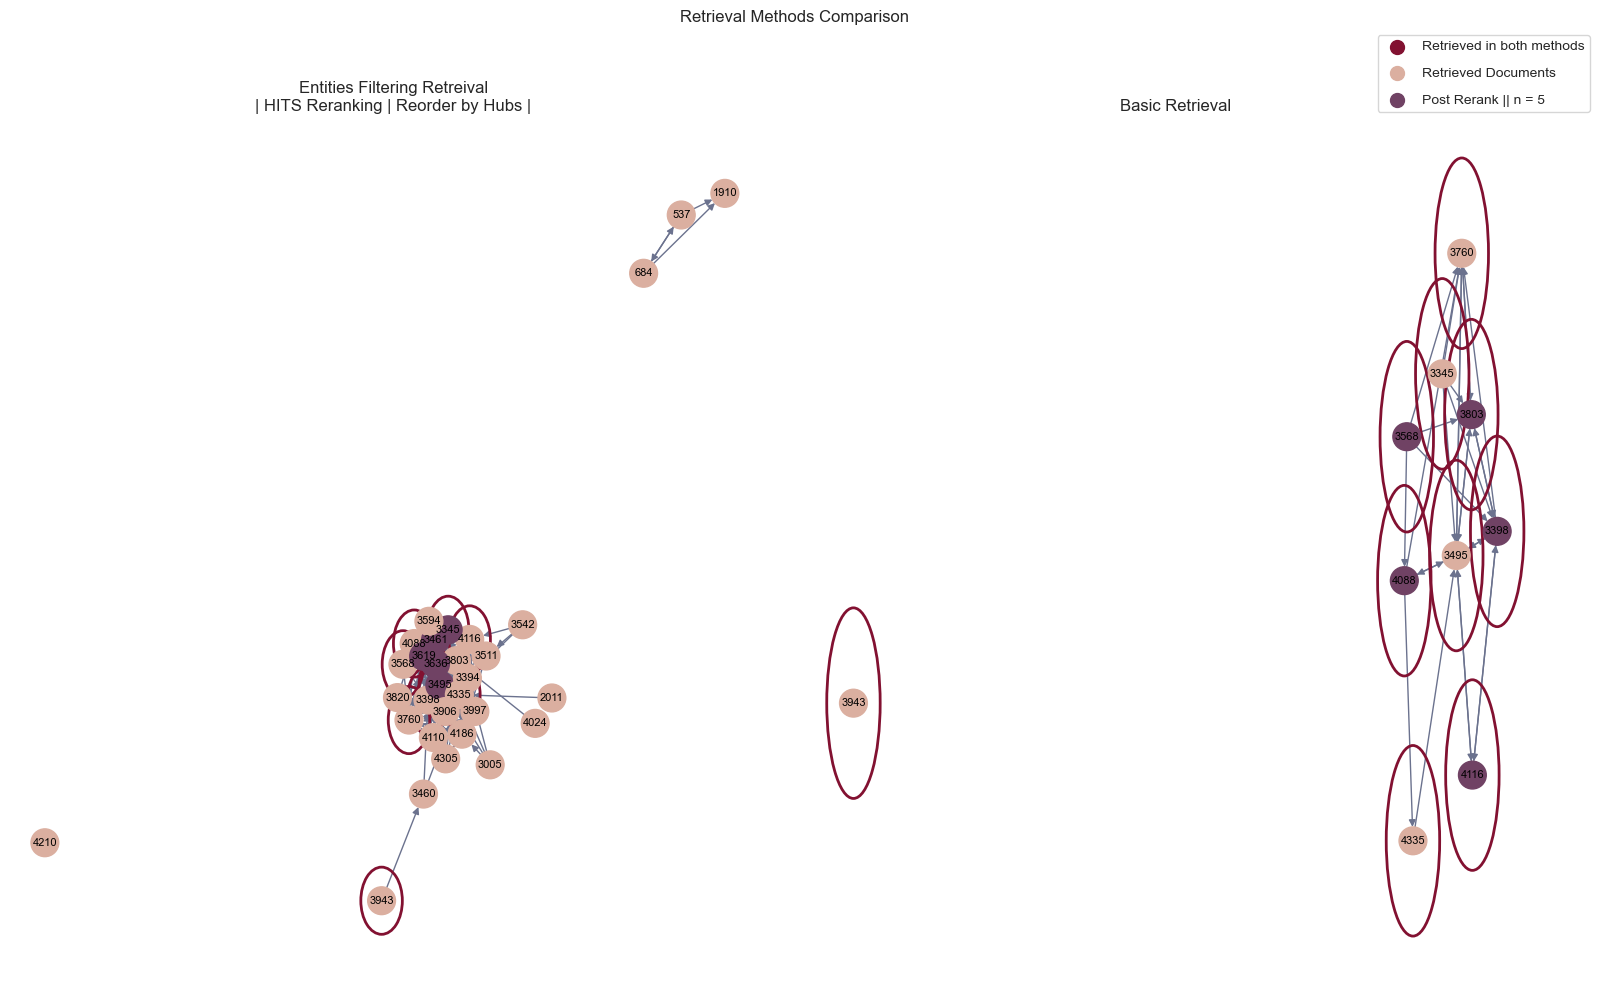

Answer: option_c
Explanation: The child is only 3 months old, and introducing cereals at this age can lead to oro-motor development issues. The child's digestive system may not be ready to handle solid foods yet, which can cause problems with chewing and swallowing. It is recommended to exclusively breastfeed infants for the first 6 months of life, as per the WHO guidelines.
Retarded oro-motor development.
question: Histopathologically rosettes are seen in

option_a:Retinoblastoma
option_b:Neurocysticercosis
option_c:PNET
option_d:Medulloblastoma

Computing Graph... (basic retrieval = True)


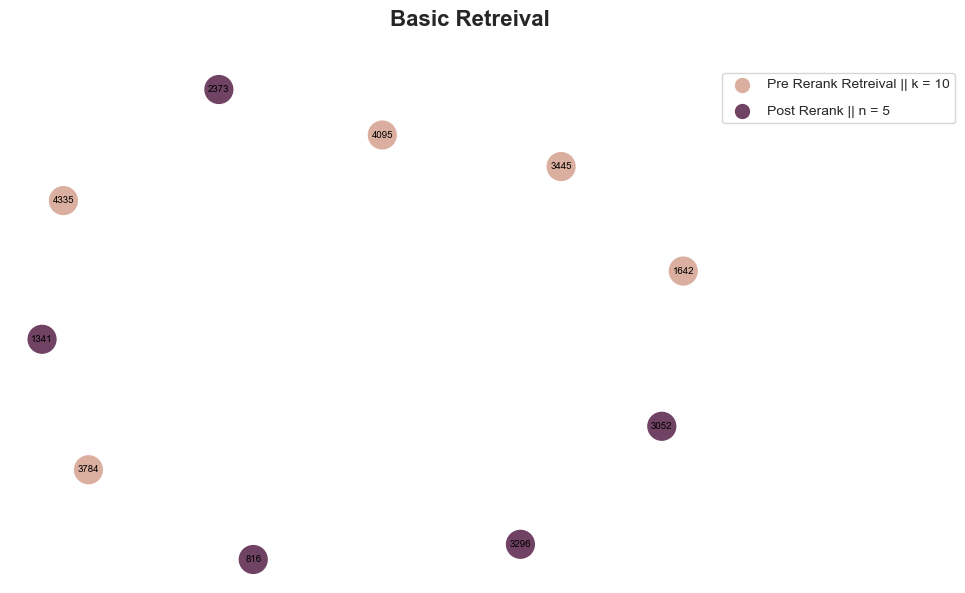

Computing Graph... (basic retrieval = False)


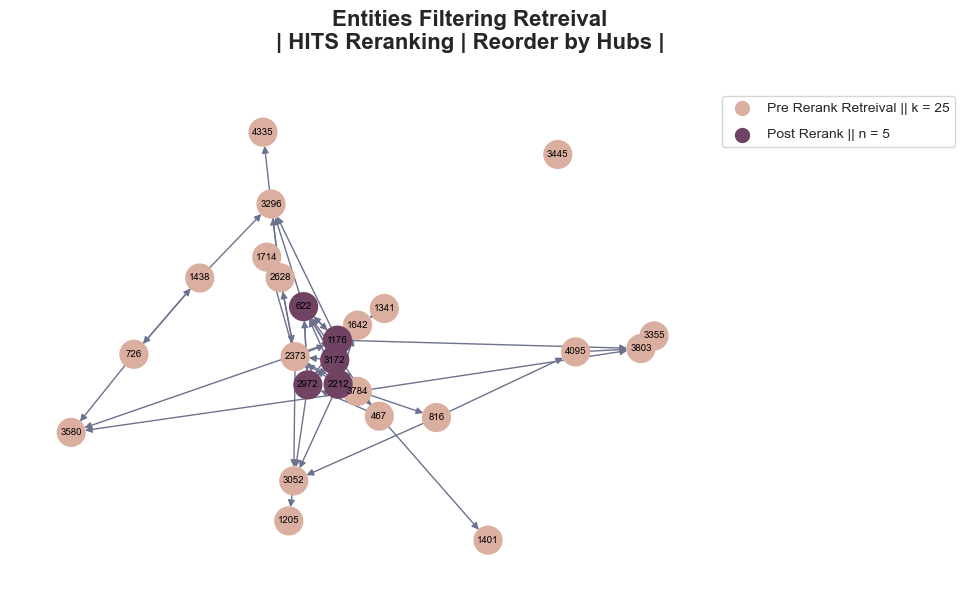

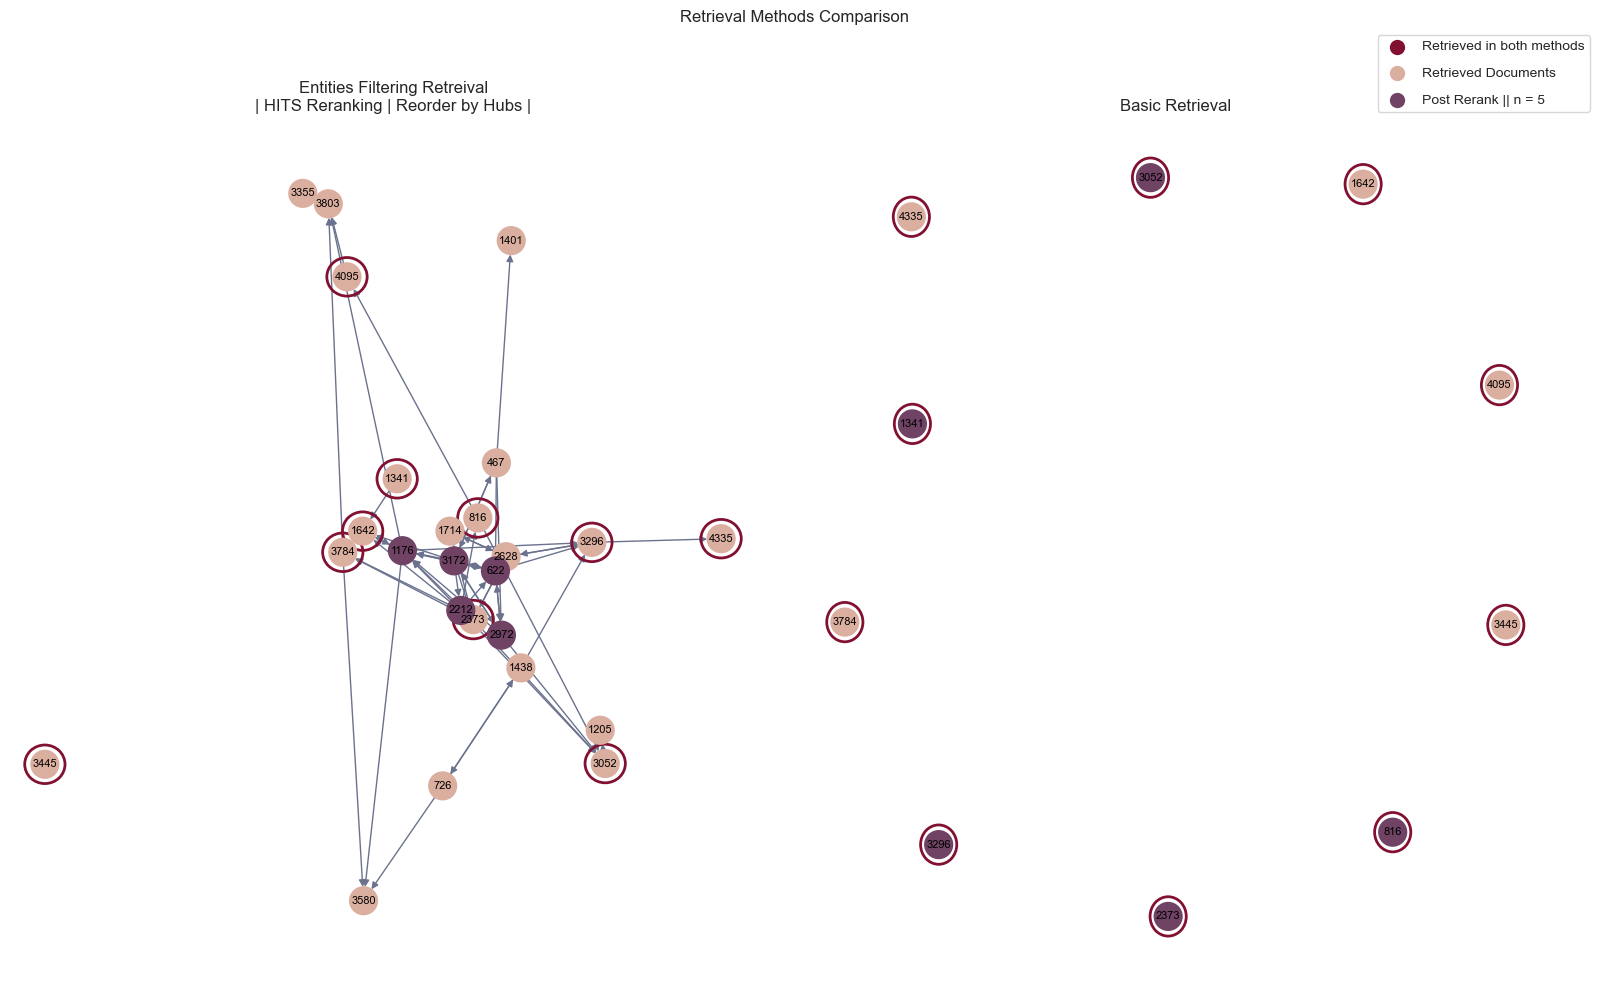

Answer: option_a:Retinoblastoma

Explanation: The correct answer is Retinoblastoma, as the provided contexts mention that retinoblastoma is a primary malignant intraocular neoplasm that arises from immature retinoblasts within the developing retina. It is the most common inherited malignancy, with approximately 40% of cases being familial. The condition has a strong tendency to invade the optic nerve and brain, which aligns with the query's reference to histopathological rosettes.
Medulloblastoma.
question: Cleaning of base metal alloy is done by

option_a:Warm HCl
option_b:Cold HF
option_c:Cold H2 So4
option_d:Sand blasting with aluminium oxide

Computing Graph... (basic retrieval = True)


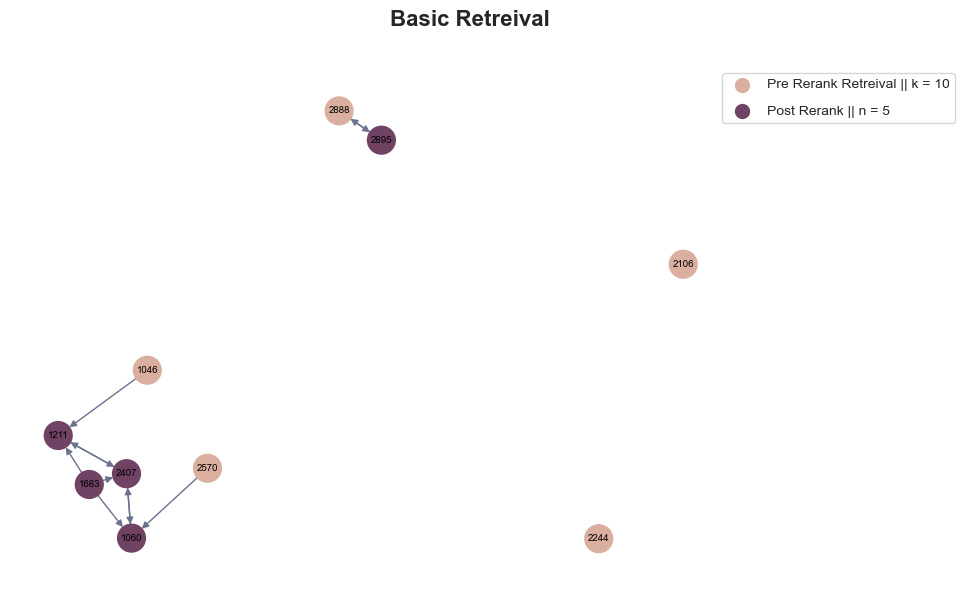

Computing Graph... (basic retrieval = False)


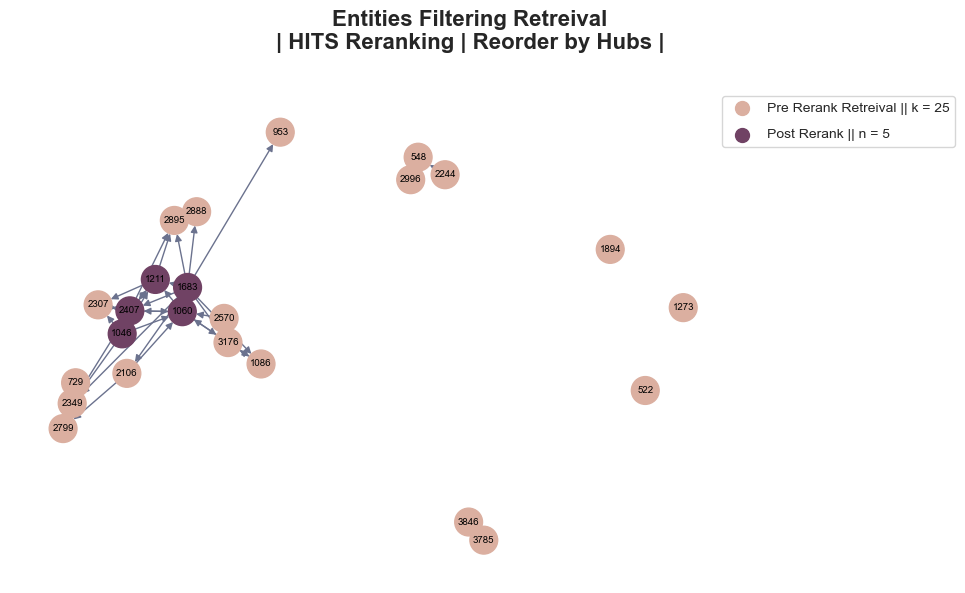

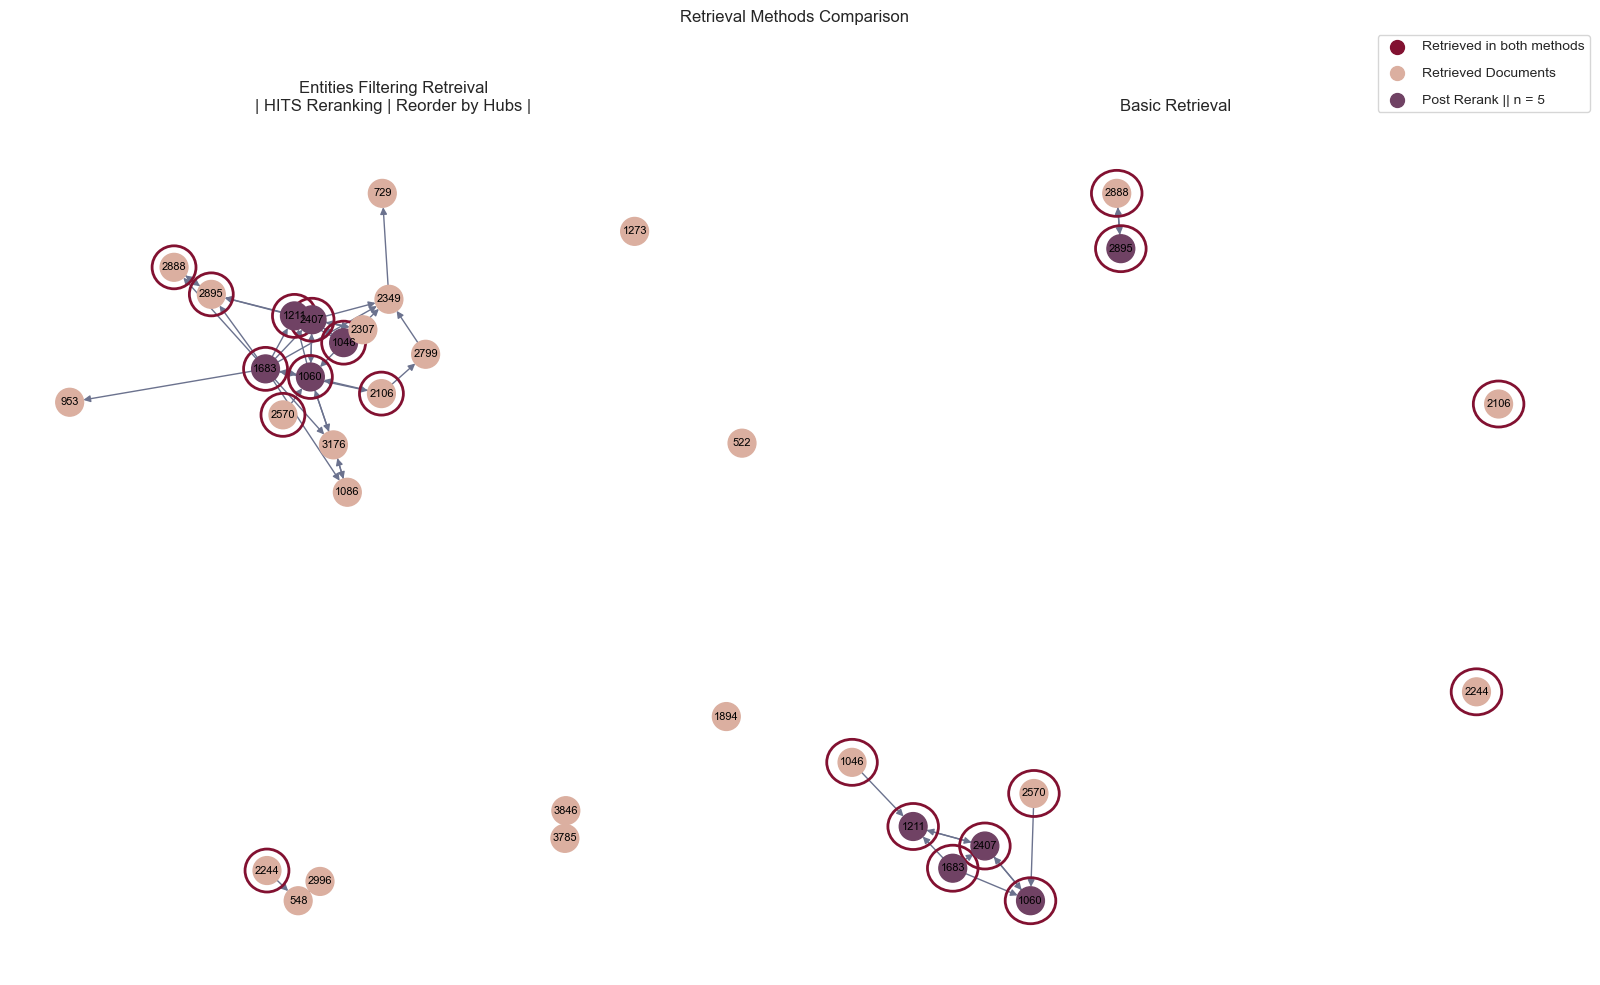

Answer: option_d
Explanation: Sandblasting with aluminum oxide is the correct method for cleaning base metal alloys. The provided context explicitly states this, and it describes the sandblasting process, making it the correct choice.
The cleaning of base metal alloys is done by sandblasting with aluminum oxide. Therefore, the answer is option_d.
question: Among anteriors highest incidence of bifurcated root is seen in

option_a:Mandibular canine
option_b:Maxilary canine
option_c:Mandibular Lateral incisor
option_d:Mandibular central incisor

Computing Graph... (basic retrieval = True)


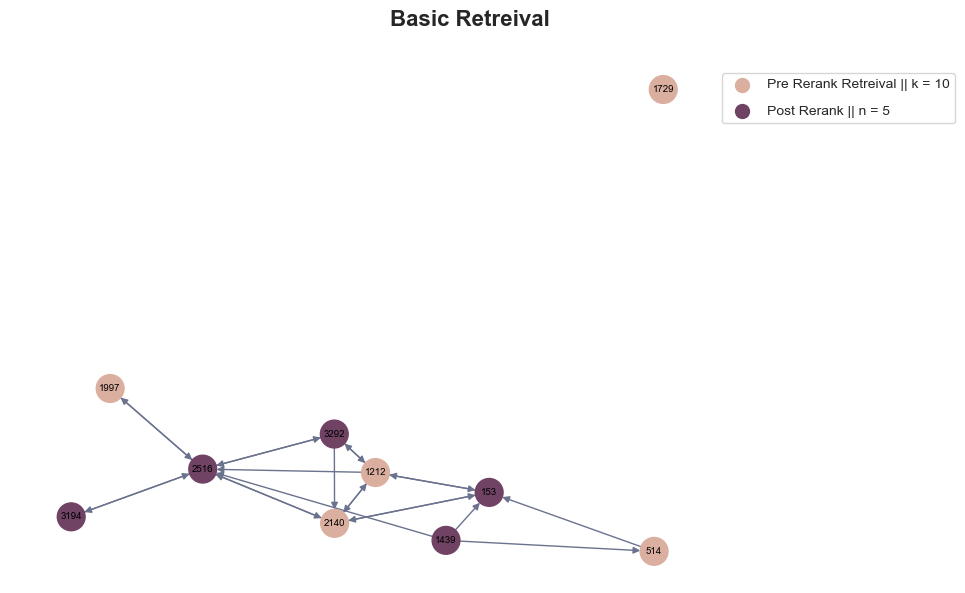

Computing Graph... (basic retrieval = False)


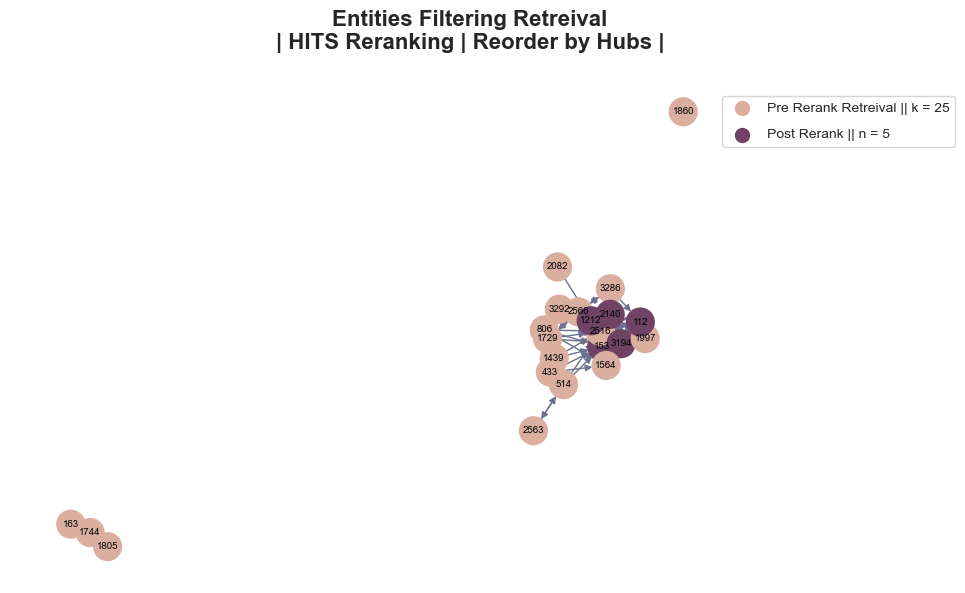

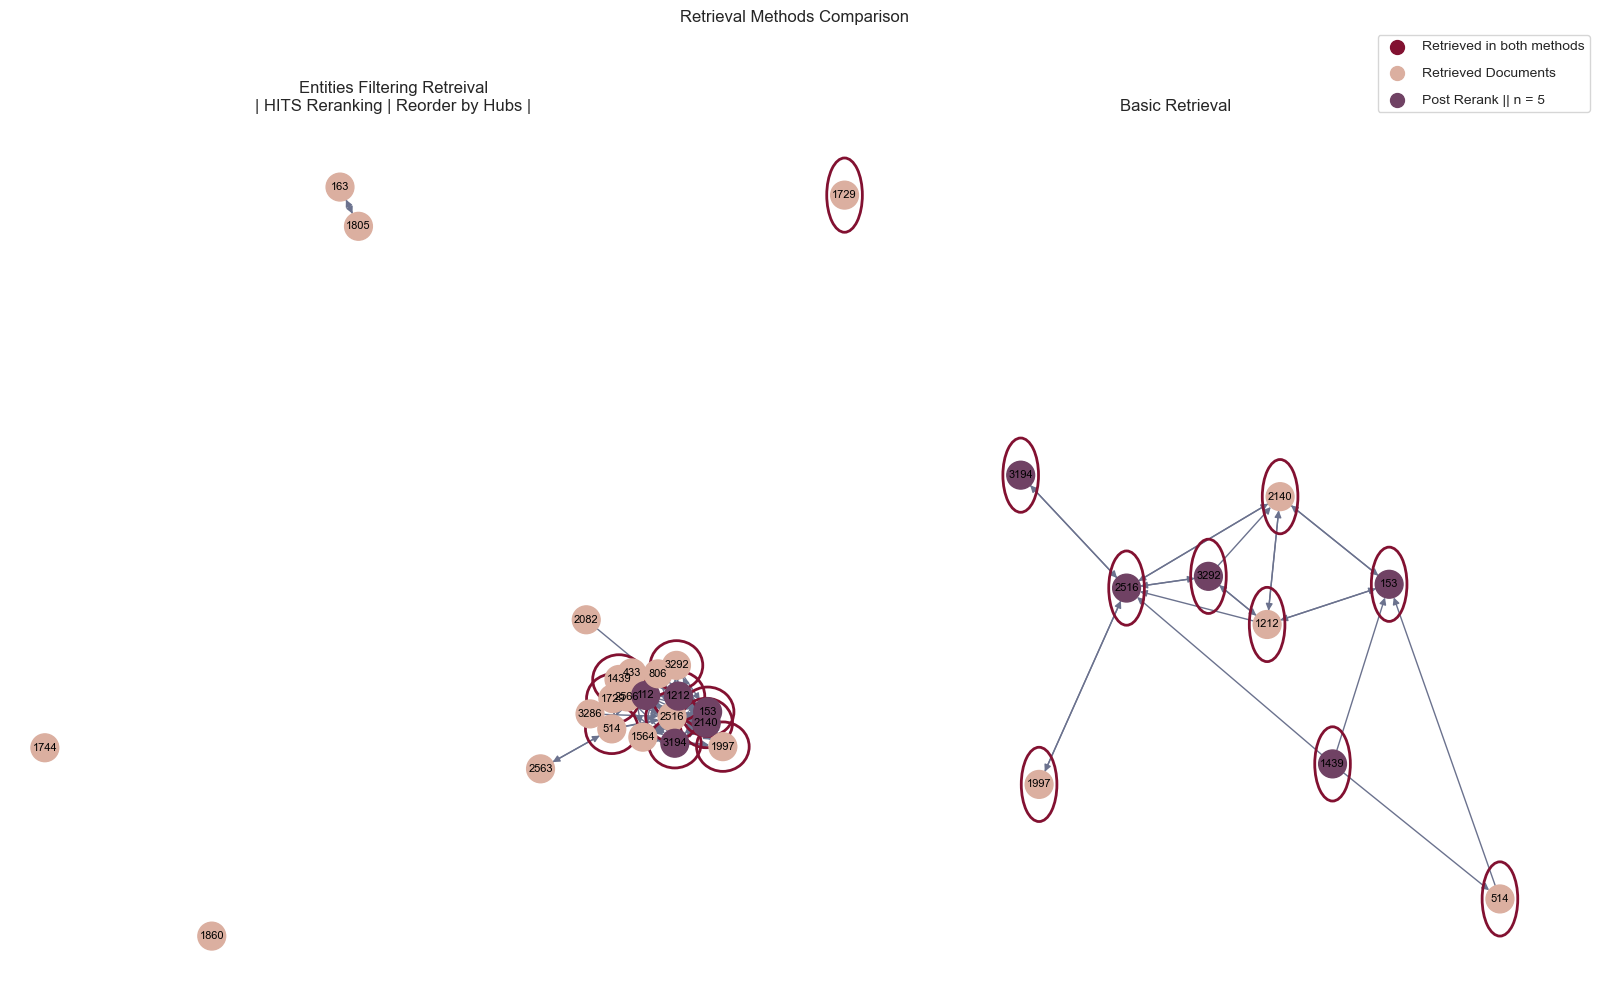

Answer: option_c:Mandibular Lateral incisor

Explanation: The context mentions that mandibular incisors have a higher incidence of bifurcated roots, and the query specifically asks about anteriors, which helps narrow it down to the mandibular central or lateral incisors. While the context doesn't explicitly state which of these two incisors has a higher incidence of bifurcation, it does mention that the pulp of a single-rooted canal with a specific triangular shape is indicative of a maxillary central incisor, implying that mandibular central incisors may be less likely to have a single root. Therefore, the mandibular lateral incisor is a more likely answer based on the available information.
The answer is option_a: Mandibular canine.
question: Lingually placed mandibular posteriors will cause all, except

option_a:Gagging
option_b:Speech difficulties
option_c:Excessive pressure on ridge
option_d:Tongue interference

Computing Graph... (basic retrieval = True)


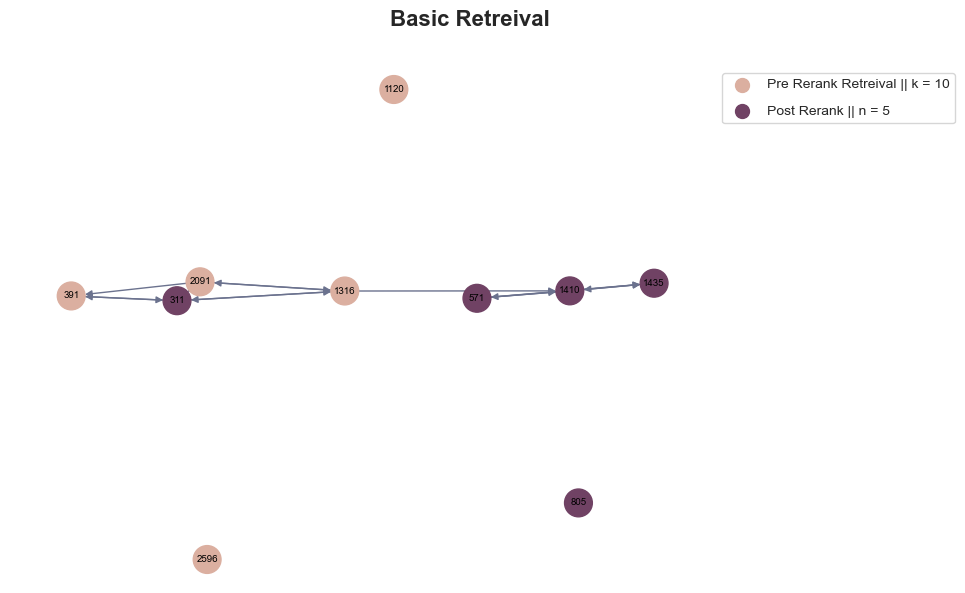

Computing Graph... (basic retrieval = False)


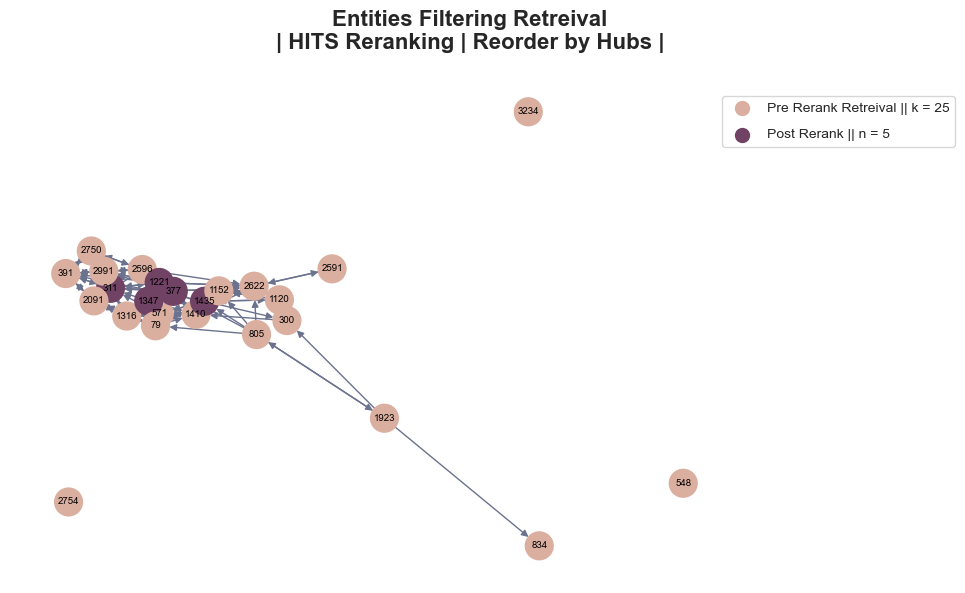

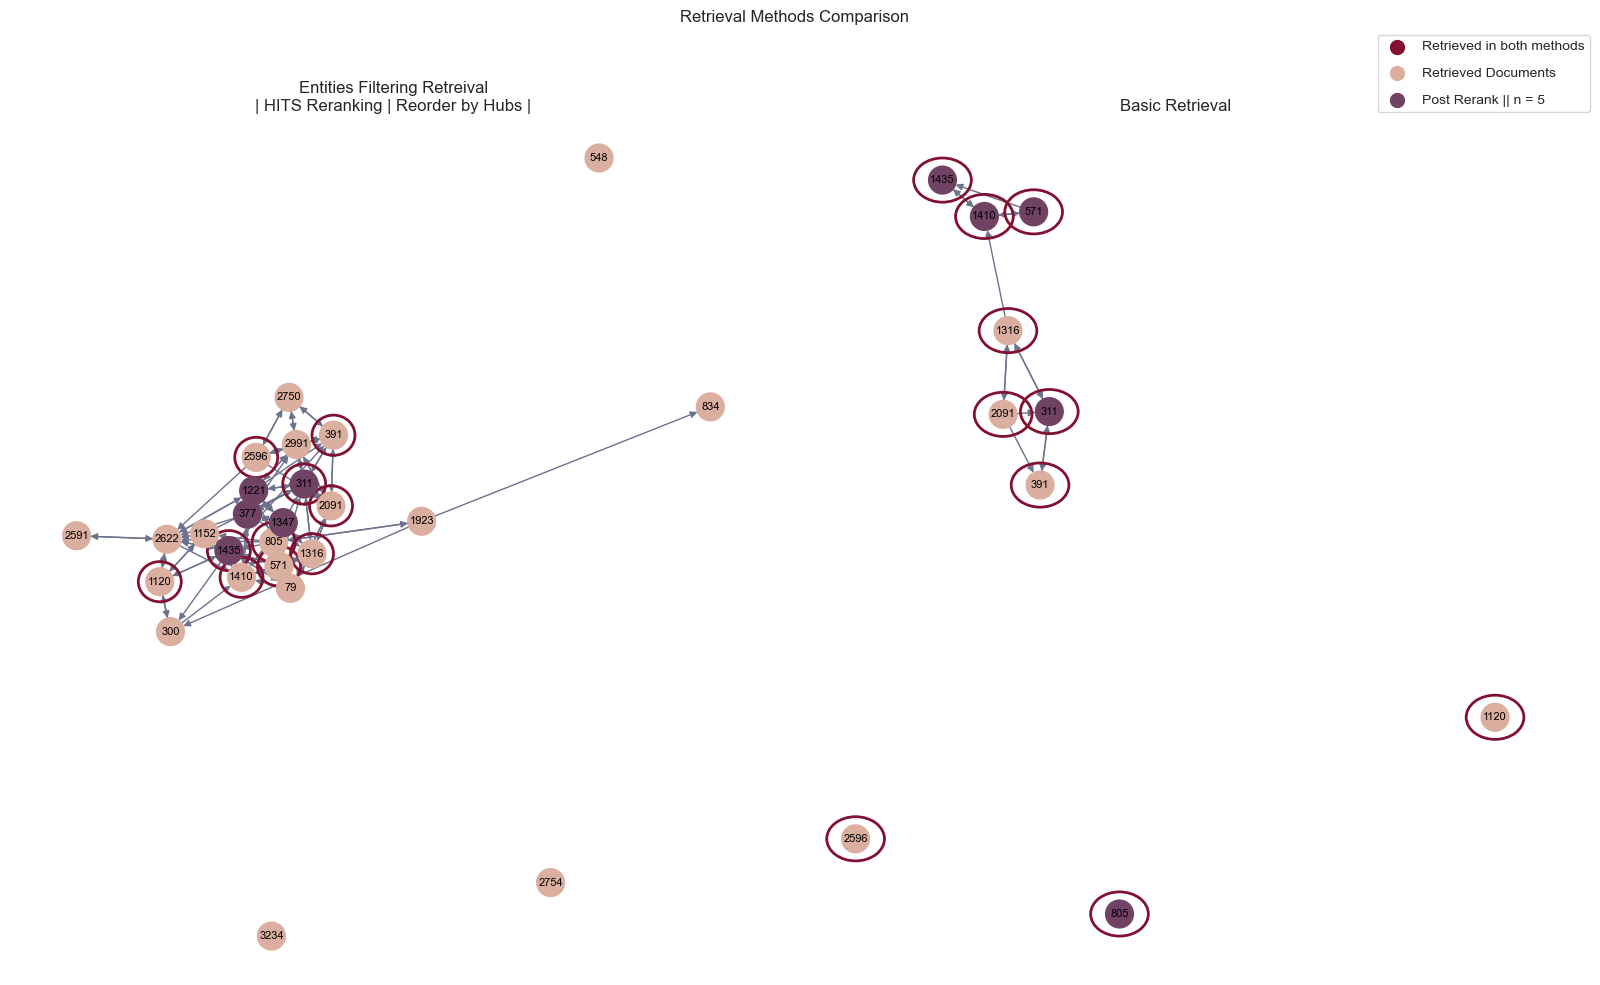

Answer: option_a
Explanation: The provided context mentions that a patient with a complete denture complains of pain while swallowing due to overextension in the distolingual aspect, which involves the superior constrictor muscle. While this may cause discomfort and potential gagging, there is no direct mention of it leading to excessive pressure on the ridge. The context also does not provide sufficient information to conclude that it will cause speech difficulties. Therefore, the correct answer is option_a, as gagging is the only option not mentioned or implied by the given context.
I don't know.
question: What is the ratio of chest compressions and breaths when a lone person is giving cardiopulmonary resuscitation?

option_a:10:01
option_b:15:01
option_c:30:01:00
option_d:30:02:00

Computing Graph... (basic retrieval = True)


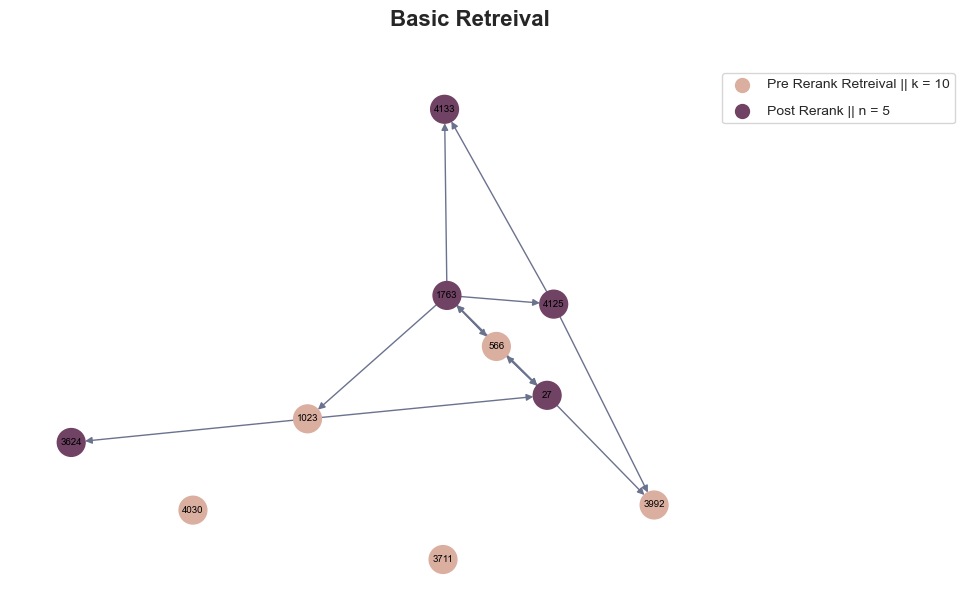

Computing Graph... (basic retrieval = False)


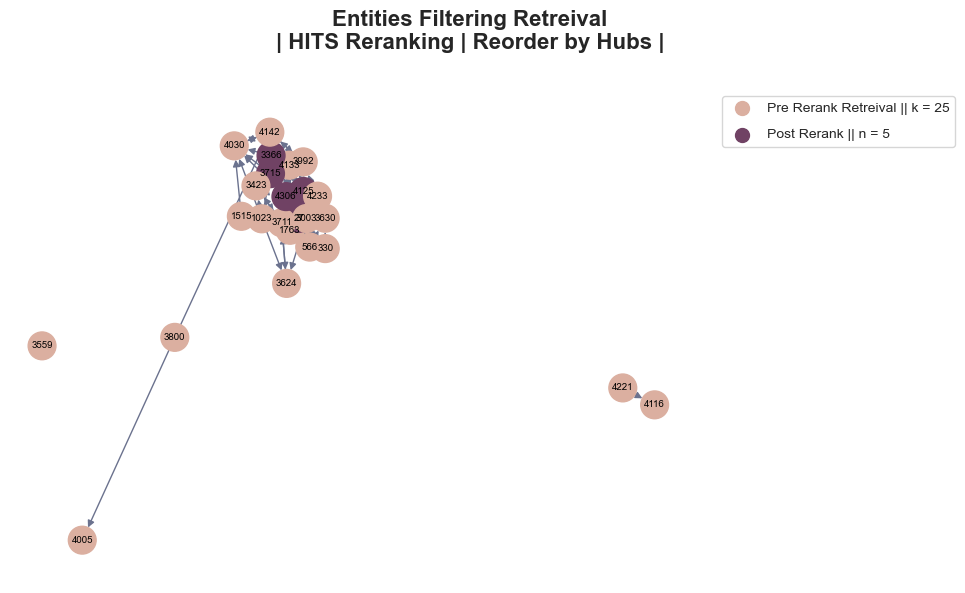

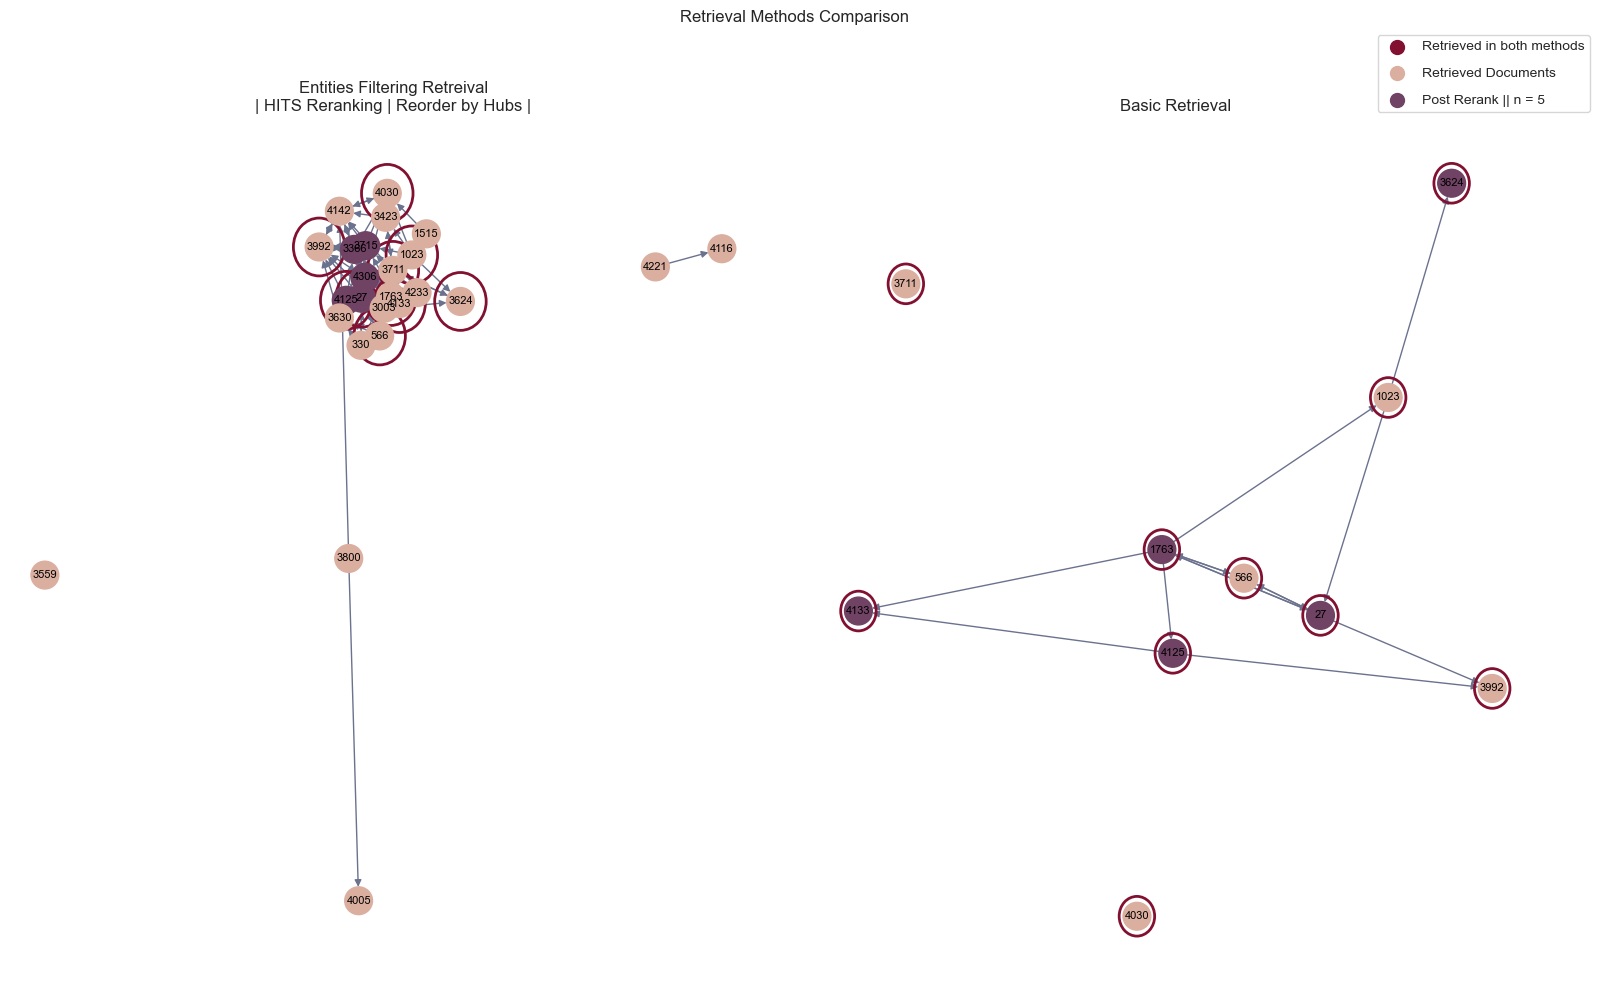

Answer: 30:02:00

Explanation: When a lone rescuer is performing cardiopulmonary resuscitation (CPR), the recommended ratio of chest compressions to breaths is 30:2. This means for every 30 chest compressions, the rescuer delivers 2 rescue breaths. This ratio ensures adequate perfusion of vital organs during cardiac arrest.
The ratio of chest compressions to mouth breathing when a lone person is performing cardiopulmonary resuscitation (CPR) is 30:2. Therefore, the answer is option_d: 30:02:00.
question: Rate of Dentinal fluid permeability depends on all except?

option_a:Temperature variation
option_b:Pressure gradient across dentinal tubule
option_c:Increase viscosity of dentinal fluid
option_d:Rate of removal of substances by blood vessels

Computing Graph... (basic retrieval = True)


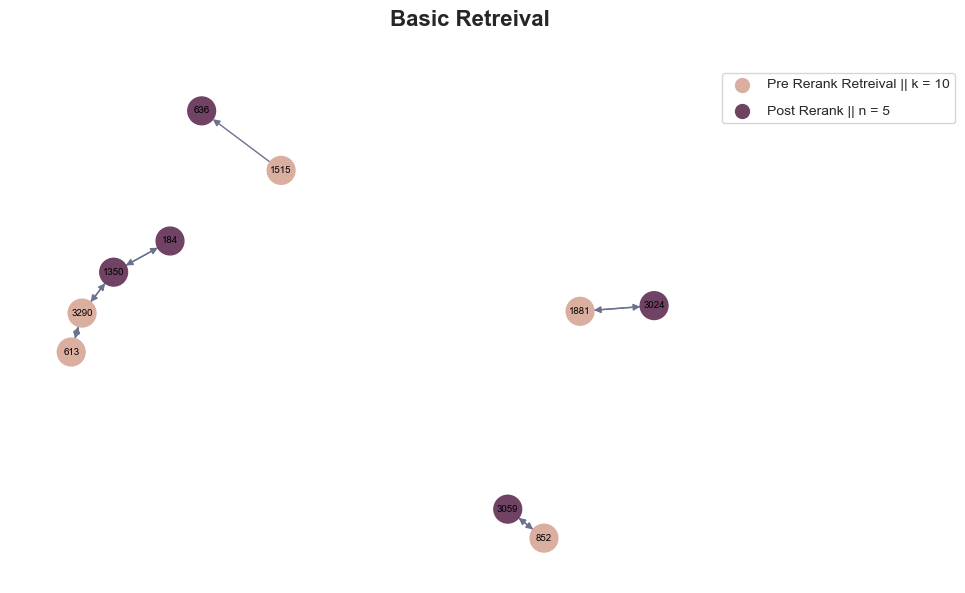

Computing Graph... (basic retrieval = False)


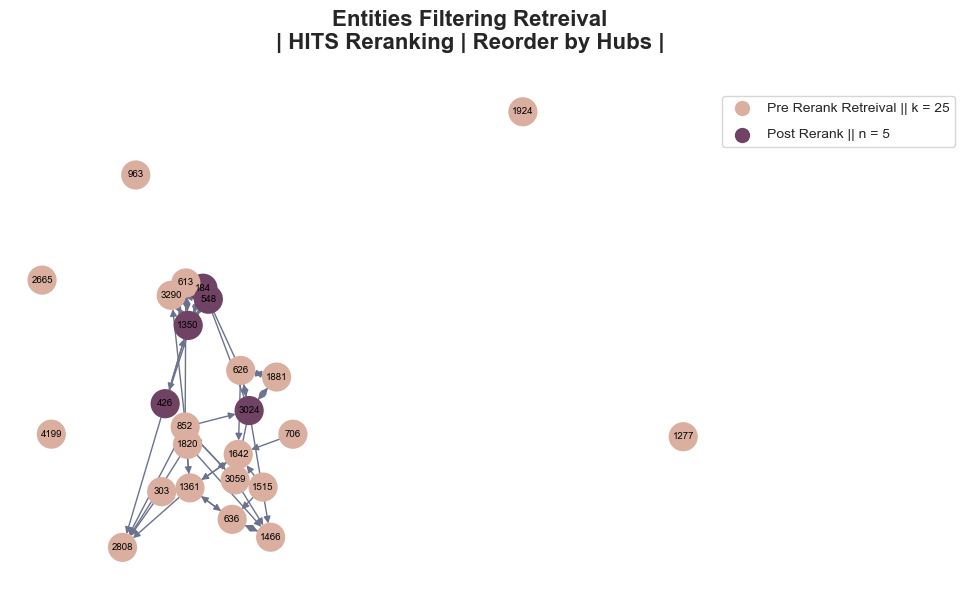

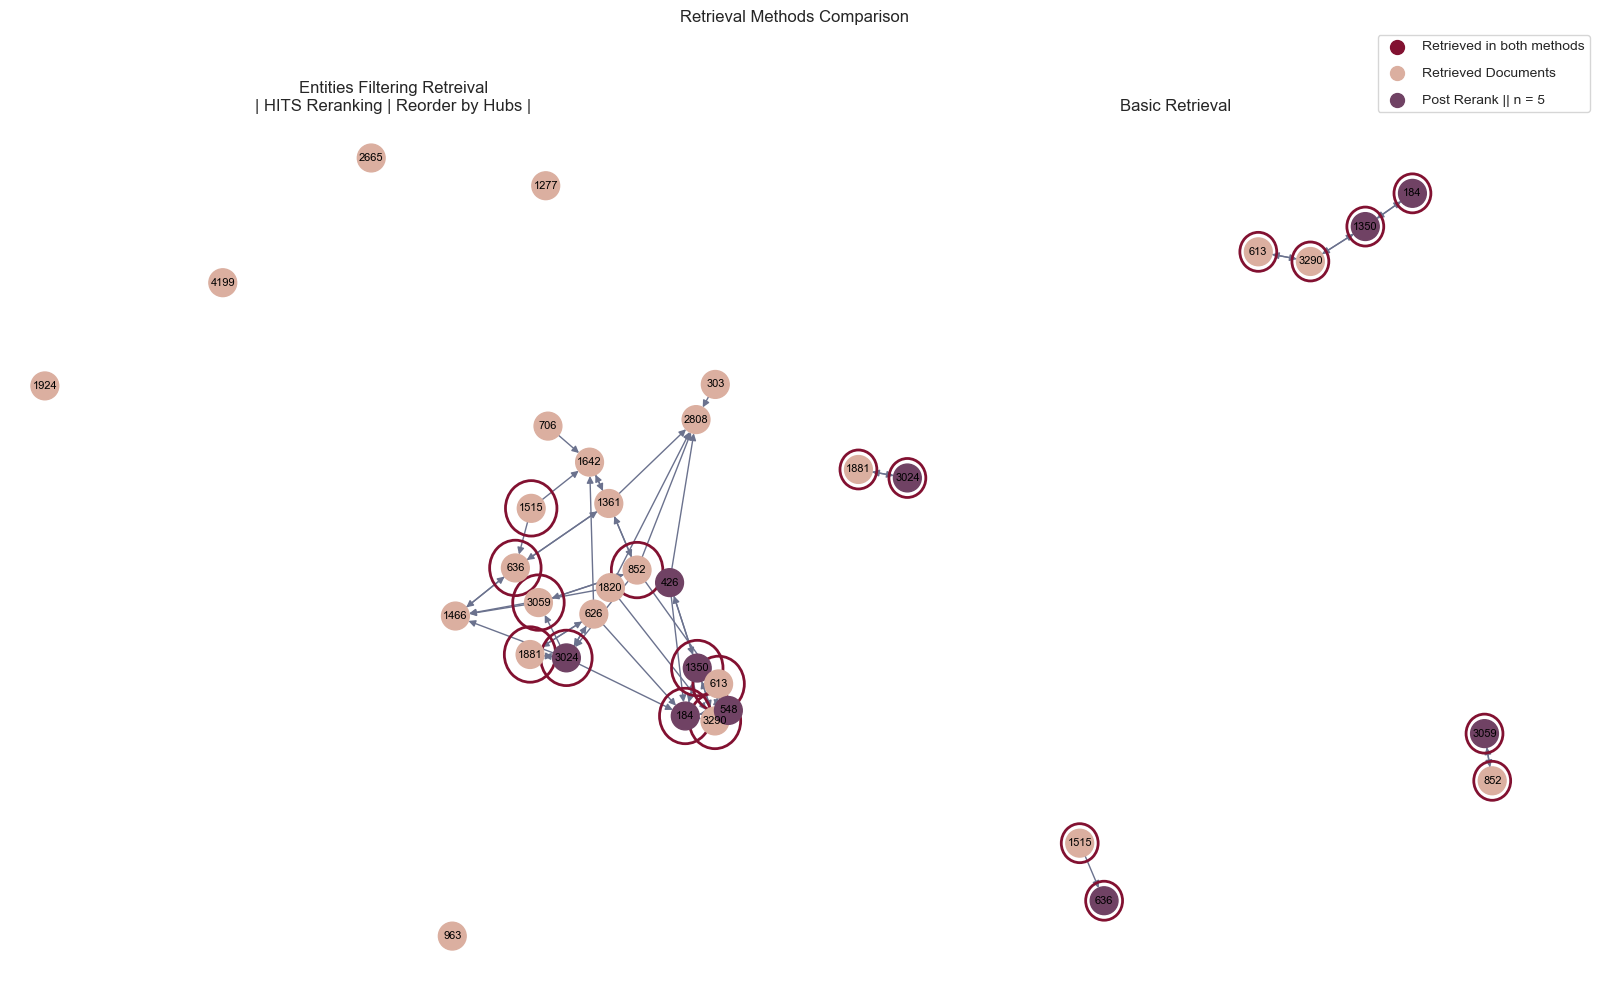

The rate of dentinal fluid permeability depends on all the factors mentioned in options a, b, and c. Therefore, the correct answer is:

option_d: Rate of removal of substances by blood vessels.


In [5]:
benchmark_rspn = []
hubs_rspn = []
auth_rspn = []
pr_rspn = []
methods = ["HITS"]  #["PageRank", "HITS"]
metrics = ["hubs"]  # ["hubs", "auth"]
for index, test in test_samples.iterrows():
    print("======================================================================")
    query = test['query']
    print(query)
    print("======================================================================")
    k, n = 25, 5
    G_basic, top_n_docs = basic_approach(query, k=10, n=5)
    G_filter, filter_retrieval_docs = filter_approach(query, k=k, n=n)

    for method in methods:
        try:
            if method == "PageRank":
                G_filter, reranked_docs_pr = rerank(G_filter, filter_retrieval_docs, n=n, method=method)
                #compare_graphs(G_filter, reranked_docs_pr, G_basic, top_n_docs, k, n, method=method)
            elif method == "HITS":
                for metric in metrics:
                    if metric == 'hubs':
                        G_filter, reranked_docs_hubs = rerank(G_filter, filter_retrieval_docs, n=n, method=method,
                                                              metric=metric)
                        compare_graphs(G_filter, reranked_docs_hubs, G_basic, top_n_docs, k, n, method=method, metric=metric)    
                    else:
                        G_filter, reranked_docs_auth = rerank(G_filter, filter_retrieval_docs, n=n, method=method,
                                                              metric=metric)
                        #compare_graphs(G_filter, reranked_docs_auth, G_basic, top_n_docs, k, n, method=method, metric=metric)      
        except Exception as e:
            print(f"Error in reranking or comparing graphs (method={method}): {e}")
            continue
    hubs_answer = generate_response(query, reranked_docs_hubs)
    hubs_rspn.append(hubs_answer)
    #auth_rspn.append(generate_response(query, reranked_docs_auth))
    #pr_rspn.append(generate_response(query, reranked_docs_pr))
    benchmark_rspn.append(benchmark_response(query, top_n_docs))

In [6]:
test_samples['benchmark_responses'] = benchmark_rspn
#test_samples['auth_responses'] = auth_rspn
test_samples['hubs_responses'] = hubs_rspn
#test_samples['pr_reponses'] = pr_rspn

test_samples

question  \
353  In which part of fallopian tube ectopic pregna...   
672  Which of the following cry is characterized by...   
299       Both ketogenic and glucogenic amino acids as   
239  Minimum number of lobes required to form a per...   
213              Method of increasing attached gingiva   
404  All of the following device work on traction p...   
244  Most common site of primary for intraocular me...   
571  The principal reason for placing an aluminium ...   
19   Sealer penetration into dentinal tubule depend...   
617  The proximal walls of a class II cavity on a d...   
729  Most common cause of interochanteric fracture ...   
107  Chances of ankyloses of mandibular molar which...   
297  A doctor who performed the autopsy on a 26-yea...   
782  A mother comes with her 3 months' child asking...   
739           Histopathologically rosettes are seen in   
96             Cleaning of base metal alloy is done by   
589  Among anteriors highest incidence of bifurcate...   
603  Lingually placed mandibular posteriors will ca...   
391  What is the ratio of chest compressions and br...   
681  Rate of Dentinal fluid permeability depends on...   

                                          answer answer_index  \
353                                 Interstitium          opd   
672                               Obstinate cry.          opa   
299                                   Isoleucine          opa   
239                                            4          opd   
213                                  Apical flap          opa   
404                            Elliot separator.          opb   
244                                       Breast          opa   
571  Reduce radiation to the skin of the patient          opc   
19                          Method of obturation          opb   
617             Converge toward occlusal surface          opb   
729                                 Osteoporosis          opa   
107                 Surgical extraction of molar          opb   
297                                      IPC 193          opa   
782              Allergy due to the food content          opa   
739                               Retinoblastoma          opa   
96            Sand blasting with aluminium oxide          opd   
589                            Mandibular canine          opa   
603                  Excessive pressure on ridge          opc   
391                                     30:02:00          opd   
681                        Temperature variation          opa   

                                  opa  \
353                           Isthmus   
672                    Obstinate cry.   
299                        Isoleucine   
239                                 1   
213                       Apical flap   
404     Ferrier double bow separator.   
244                            Breast   
571              Reduce exposure time   
19                Type of sealer used   
617  Follow directions of enamel rods   
729                      Osteoporosis   
107     Splinting of mandibular molar   
297                           IPC 193   
782   Allergy due to the food content   
739                    Retinoblastoma   
96                           Warm HCl   
589                 Mandibular canine   
603                           Gagging   
391                             10:01   
681             Temperature variation   

                                          opb  \
353                                   Ampulla   
672                             Frighten cry.   
299                                   Leucine   
239                                         2   
213                               Widman flap   
404                         Elliot separator.   
244                                     Ovary   
571    Decrease development time of the films   
19                       Method of obturation   
617          Converge toward occlusal surface   
729                               Paget's dis   
107        

In [8]:
test_samples.to_csv(f"test_samples/sample4.csv")

In [11]:
create_df = False
if create_df:
    dfs = []
    for i in range(1,5):
        tagged_sample = pd.read_csv(f"test_samples/sample{i}.csv")
        dfs.append(tagged_sample)
    final_df = pd.concat(dfs, ignore_index=True)
    final_df = final_df[["Unnamed: 0","query","benchmark_responses","hubs_responses","bench_rank","hubs_rank"]].rename({"Unnamed: 0":"id"},axis=1)
    final_df.to_csv("tagged_tests.csv",index=False)

id                                              query  \
0   621  question: Exact number of weeks between last m...   
1   579  question: Deciduous teeth do not show fluorosi...   
2   653  question: Location of MB2 in maxillary first m...   
3   682  question: Occulomotor nerve passes through\n\n...   
4    88  question: Mid palatal split following Le-Fort ...   
5   236  question: Lacrimation is affected due to damag...   
6   597  question: Tooth brush abrasions are more commo...   
7   614  question: Hardness of stone surface is affecte...   
8   127  question: Initial clicking of TMJ while openin...   
9   635  question: Lipoarabinomannan (LAM) assay in uri...   
10  255  question: Partial veneer crown is contraindica...   
11  241  question: Active form of vitamin D in kidney i...   
12  319  question: Rake angle for tungsten carbide burs...   
13  376  question: Which of the following Slatements is...   
14  239  question: Minimum number of lobes required to ...   
15  398  question: Figure depicts:\n\noption_a:Balanced...   
16  142  question: A drop in fetal heart rate that typi...   
17  511  question: Keeping in Jack-knife position for l...   
18  505  question: First line therapy in anaphylactic s...   
19  171  question: The case of biliary duct stricture w...   
20  354  question: On abdominal ultrasound gallbladder ...   
21   98  question: To remove non working side interfere...   
22  321  question: In Galactorrhoea--amenorrhea syndrom...   
23  206  question: Chi-square test is used to measure t...   
24  824  question: About Bacteroids. True are all excep...   
25  371  question: In occlusion, the teeth have\n\nopti...   
26  565  question: During polymerisation of acrylic res...   
27  700  question: Which of these findings is not speci...   
28  430  question: Which of the following type of tongu...   
29  695  question: On laboratory investigations in a pa...   
30  353  question: In which part of fallopian tube ecto...   
31  672  question: Which of the following cry is charac...   
32  299  question: Both ketogenic and glucogenic amino ...   
33  239  question: Minimum number of lobes required to ...   
34  213  question: Method of increasing attached gingiv...   
35  404  question: All of the following device work on ...   
36  244  question: Most common site of primary for intr...   
37  571  question: The principal reason for placing an ...   
38   19  question: Sealer penetration into dentinal tub...   
39  617  question: The proximal walls of a class II cav...   
40  729  question: Most common cause of interochanteric...   
41  107  question: Chances of ankyloses of mandibular m...   
42  297  question: A doctor who performed the autopsy o...   
43  782  question: A mother comes with her 3 months' ch...   
44  739  question: Histopathologically rosettes are see...   
45   96  question: Cleaning of base metal alloy is done...   
46  589  question: Among anteriors highest incidence of...   
47  603  question: Lingually placed mandibular posterio...   
48  391  question: What is the ratio of chest compressi...   
49  681  question: Rate of Dentinal fluid permeability ...   

                                  benchmark_responses  \
0   I don't know. The query does not seem to be re...   
1   Deciduous teeth do not show fluorosis because ...   
2                                       I don't know.   
3          The answer is c) Inferior orbital fissure.   
4                    The answer is option_b:Inferior.   
5   The correct answer is option_a: Nasociliary ne...   
6   Tooth brush abrasions are most commonly found ...   
7   The hardness of a stone surface is affected by...   
8   The initial clicking of TMJ while opening is d...   
9   Lipoarabinomannan (LAM) assay in urine is used...   
10  Partial veneer crown is contraindicated in opt...   
11  The active form of vitamin D in the kidney is ...   
12                                   Slight negative.   
13  The answer is option_a: Parathyroid horm

In [12]:
from evaluation_metrics import *

In [42]:
final_df = pd.read_csv('tagged_tests.csv')
hubs_values = final_df["hubs_rank"].value_counts()
bench_values = final_df["bench_rank"].value_counts()

In [43]:
fn_hubs = final_df[(final_df["bench_rank"] == 'Correct') & (final_df["hubs_rank"] == "Don't know")]
tn_hubs = final_df[(final_df["bench_rank"] != 'Correct') & (final_df["hubs_rank"] == "Don't know")]
tp_hubs = final_df[(final_df["hubs_rank"] == "Correct")]
fp_hubs = final_df[(final_df["hubs_rank"] == "Incorrect")]


fn_bench = final_df[(final_df["hubs_rank"] == 'Correct') & (final_df["bench_rank"] == "Don't know")]
tn_bench = final_df[(final_df["hubs_rank"] != 'Correct') & (final_df["bench_rank"] == "Don't know")]
tp_bench = final_df[(final_df["bench_rank"] == "Correct")]
fp_bench = final_df[(final_df["bench_rank"] == "Incorrect")]

In [44]:
def calculate_metrics(fn, tn, tp, fp):
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    balanced_accuracy = (recall + specificity) / 2

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity,
        'FPR': fpr,
        'FNR': fnr,
        'Balanced Accuracy': balanced_accuracy
    }


metrics_hubs = calculate_metrics(len(fn_hubs), len(tn_hubs), len(tp_hubs), len(fp_hubs))
metrics_bench = calculate_metrics(len(fn_bench), len(tn_bench), len(tp_bench), len(fp_bench))
metrics_data = {
    'Hubs Rank': list(metrics_hubs.values()),
    'Benchmark Rank': list(metrics_bench.values())
}

metrics_df = pd.DataFrame(metrics_data, index=metrics_hubs.keys())

print("\nCombined Metrics DataFrame:")
print(metrics_df)

Metrics for Hubs Rank:
{'Accuracy': 0.62, 'Precision': 0.5161290322580645, 'Recall': 0.8, 'F1 Score': 0.6274509803921569, 'Specificity': 0.5, 'FPR': 0.5, 'FNR': 0.2, 'Balanced Accuracy': 0.65}

Metrics for Benchmark Rank:
{'Accuracy': 0.4, 'Precision': 0.3695652173913043, 'Recall': 0.9444444444444444, 'F1 Score': 0.53125, 'Specificity': 0.09375, 'FPR': 0.90625, 'FNR': 0.05555555555555555, 'Balanced Accuracy': 0.5190972222222222}

Combined Metrics DataFrame:
                   Hubs Rank  Benchmark Rank
Accuracy            0.620000        0.400000
Precision           0.516129        0.369565
Recall              0.800000        0.944444
F1 Score            0.627451        0.531250
Specificity         0.500000        0.093750
FPR                 0.500000        0.906250
FNR                 0.200000        0.055556
Balanced Accuracy   0.650000        0.519097


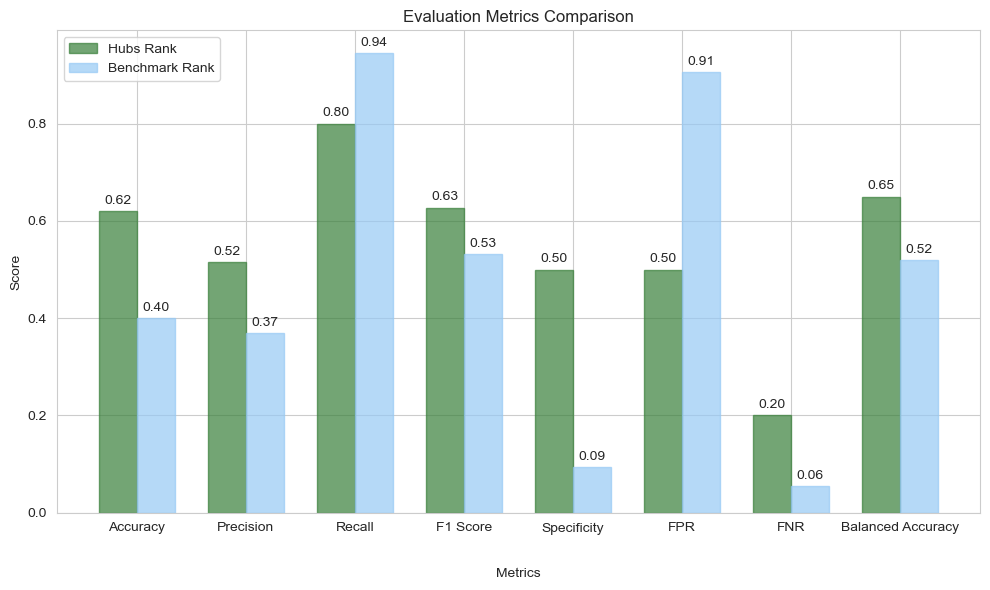

In [85]:
df = metrics_df
width = 0.35 
x = np.arange(len(df)) 

fig, ax = plt.subplots(figsize=(10, 6))

hubs_bars = ax.bar(x - width / 2, df['Hubs Rank'], width, label='Hubs Rank', color='#387F39',edgecolor="#387F39", alpha=0.7)
bench_bars = ax.bar(x + width / 2, df['Benchmark Rank'], width, label='Benchmark Rank', color='#96C9F4',edgecolor="#96C9F4", alpha=0.7)

ax.set_xlabel('\n\nMetrics')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=0, ha='center')  

ax.legend(loc='upper left')


for bars in [hubs_bars, bench_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.tight_layout()
plt.show()

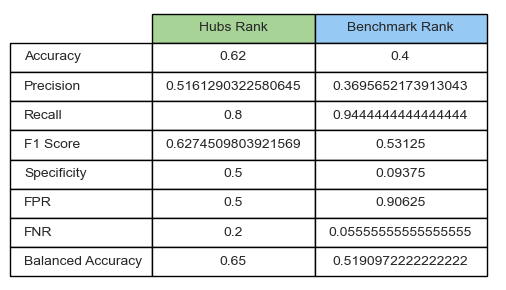

In [88]:
fig, ax = plt.subplots(figsize=(5, 3))
colors = ['#A7D397', '#96C9F4'] 
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, colColours=colors, loc='center', cellLoc='center')

ax.axis('off')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5) 

table.auto_set_column_width([0, 1]) 
plt.tight_layout()
plt.show()

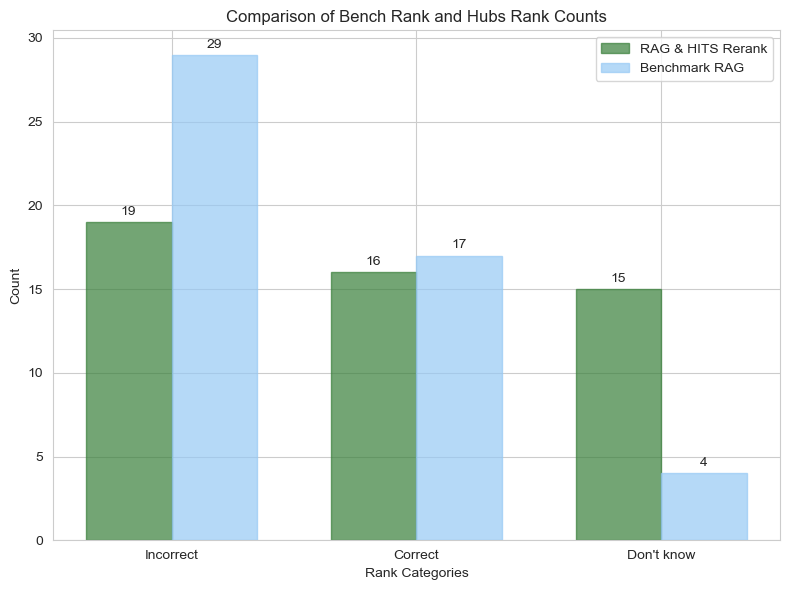

In [91]:
width = 0.35  
categories = bench_values.index.to_list()
x = np.arange(len(categories))  
fig, ax = plt.subplots(figsize=(8, 6))


hubs_bars = ax.bar(x - width/2, hubs_values, width, label='RAG & HITS Rerank',color='#387F39',edgecolor="#387F39", alpha=0.7)
bench_bars = ax.bar(x + width/2, bench_values, width, label='Benchmark RAG', color='#96C9F4',edgecolor="#96C9F4", alpha=0.7)


ax.set_xlabel('Rank Categories')
ax.set_ylabel('Count')
ax.set_title('Comparison of Bench Rank and Hubs Rank Counts')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


for bars in [hubs_bars, bench_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()